  # <center>**PYTHON ADVANCED ASSIGNMENT 1**

## INSTRUCTOR : VAHID HADAVI

### STUDENTS:
* ALISHA THOMAS
* ASWATHY ANILKUMAR
* JASMIN JOSEPH
* SUDHY SUKUMARAN

## 1.SCRAPING DATA FROM KIJIJI

### 1.1 Installing required libraries

In [154]:
# For query a website
import urllib.request
import random
import time


# To parse a html page and extract required data
from bs4 import BeautifulSoup
import numpy as np
import re
from geopy.geocoders import Nominatim
from sklearn.impute import KNNImputer
import pandas as pd
import string
from sklearn.preprocessing import LabelEncoder

# Visualization libraries
# from pandas_profiling import ProfileReport

import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Nlp libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import string
import spacy
# Load the language model
spacy_nlp = spacy.load('en_core_web_sm')

### 1.2 Data Scraping

### 1.3 Converting scraped text file to csv file

In [2]:

# Initialize lists to store data
price = []
title = []
price_condition=[]

posted_date=[]
Bedrooms=[]
Bathrooms=[]
unit_type=[]


Hydro=[]
Heat=[]
Water=[]
Cable_TV=[]
Internet=[]
parking=[]
agreement_type=[]
moveIn_date=[]
pet_friendly=[]
size_sqft=[]
furnished_info=[]
description=[]
# Read the content of the text file and extract data
with open('_com3.txt', 'rb') as file:
#     with open('file.txt', 'rb') as f:
#     byte_sequence = f.read()

# decoded_text = byte_sequence.decode('utf-8')

    for line in file:
        data = eval(line)  # Convert string to dictionary
        price.append(data['price'])
        title.append(data['title'])
        price_condition.append(data['price_condition'])
       
        posted_date.append(data['posted_date'])

        Bedrooms.append(data.get('Bedrooms'))
        Bathrooms.append(data.get('Bathrooms'))
        
        unit_type.append(data.get('unit_type','N/A'))
        
        Hydro.append(data.get('Hydro'))
        Heat.append(data.get('Heat'))
        Water.append(data.get('Water'))
        Cable_TV.append(data.get('Cable / TV'))
        Internet.append(data.get('Internet'))
        parking.append(data.get('parking'))
        agreement_type.append(data.get('agreement_type'))
        moveIn_date.append(data.get('moveIn_date'))
        pet_friendly.append(data.get('pet_friendly'))
        size_sqft.append(data.get('size_sqrt') or data.get('size_sqft'))
       
        furnished_info.append(data.get('furnished_info'))
        description.append(data.get('description'))
# Create a pandas DataFrame
df = pd.DataFrame({'Title':title,'Price_condition':price_condition,
                   'Unit_type':unit_type,'Bedrooms':Bedrooms,'Bathrooms':Bathrooms,'Hydro':Hydro,
                   'Heat':Heat,'Water':Water,'Cable / TV':Cable_TV,'Internet':Internet,'Parking':parking,
                   'Agreement_type':agreement_type,
                   'MoveIn_date':moveIn_date,'Pet_friendly':pet_friendly,'Size_sqft':size_sqft,
                   'Furnished_info':furnished_info,'Price':price,'Description':description })


In [3]:
#covert it to csv file for storing the data
df.to_csv("property_rental_dataframe.csv",index=False) 


## 2. Data wranging

In [4]:
## Read the dataset
df = pd.read_csv("property_rental_dataframe.csv")

In [5]:
# Display first 5 rows
df.head(5)

Title          Price_condition  \
0  Forest Hill Residences - 3 Bedroom Apartment f...  Some Utilities Included   
1  569 Broadview Ave - Broadview Mansions at 569 ...    No Utilities Included   
2  Split-Level 2 Bedroom, Etobicoke!  Dundas St. ...  Some Utilities Included   
3  2 Bedroom Apartment in Kitchener - all inclusive!   All Utilities Included   
4     NEWLY RENOVATED 1 BEDROOM SUITE AVAILABLE NOW!  Some Utilities Included   

   Unit_type                   Bedrooms     Bathrooms Hydro Heat Water  \
0  Apartment                Bedrooms: 3  Bathrooms: 1    No  Yes   Yes   
1  Apartment  Bedrooms: Bachelor/Studio  Bathrooms: 1   NaN  NaN   NaN   
2  Apartment                Bedrooms: 2  Bathrooms: 1    No   No   Yes   
3  Apartment                Bedrooms: 2  Bathrooms: 1   Yes  Yes   Yes   
4  Apartment                Bedrooms: 1  Bathrooms: 1    No  Yes   Yes   

  Cable / TV Internet Parking Agreement_type MoveIn_date Pet_friendly  \
0        NaN      NaN       0         1 Year         NaN          Yes   
1        NaN      NaN       0         1 Year         NaN          Yes   
2        NaN      NaN       0         1 Year         NaN          Yes   
3        NaN      NaN       1         1 Year         NaN           No   
4        NaN      NaN       0         1 Year         NaN          Yes   

       Size_sqft Furnished_info   Price  \
0          2,026             No  4500.0   
1            425             No  2099.0   
2  Not Available             No  2275.0   
3  Not Available             No  2125.0   
4            834             No  1895.0   

                                         Description  
0  Description\nNewly renovated 3-bedroom unit wi...  
1  Description\nBroadview Mansions at 569 Broadvi...  
2  Description\nRealstar's 5062-5078 Dundas Stree...  
3  Description\nAre you looking for a modern, cle...  
4  Description\n1 Bed, 1 Bath, Spacious, Newly Re...

In [6]:
#To get the shape of the dataframe
df.shape

(11076, 18)

In [7]:
#Dropping the duplicate columns
df.drop_duplicates(inplace=True)
#shape of dataframe after removing duplicates
df.shape

(6084, 18)

In [8]:
#To get the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6084 entries, 0 to 11075
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            6083 non-null   object 
 1   Price_condition  6035 non-null   object 
 2   Unit_type        6035 non-null   object 
 3   Bedrooms         6035 non-null   object 
 4   Bathrooms        5846 non-null   object 
 5   Hydro            3514 non-null   object 
 6   Heat             3514 non-null   object 
 7   Water            3514 non-null   object 
 8   Cable / TV       208 non-null    object 
 9   Internet         923 non-null    object 
 10  Parking          6035 non-null   object 
 11  Agreement_type   6035 non-null   object 
 12  MoveIn_date      4556 non-null   object 
 13  Pet_friendly     6036 non-null   object 
 14  Size_sqft        5887 non-null   object 
 15  Furnished_info   6036 non-null   object 
 16  Price            5750 non-null   float64
 17  Description      6

In [9]:
# To get the names of each columns
df.columns

Index(['Title', 'Price_condition', 'Unit_type', 'Bedrooms', 'Bathrooms',
       'Hydro', 'Heat', 'Water', 'Cable / TV', 'Internet', 'Parking',
       'Agreement_type', 'MoveIn_date', 'Pet_friendly', 'Size_sqft',
       'Furnished_info', 'Price', 'Description'],
      dtype='object')

In [10]:
# Check for missing values in each columns
df.isna().sum()

Title                 1
Price_condition      49
Unit_type            49
Bedrooms             49
Bathrooms           238
Hydro              2570
Heat               2570
Water              2570
Cable / TV         5876
Internet           5161
Parking              49
Agreement_type       49
MoveIn_date        1528
Pet_friendly         48
Size_sqft           197
Furnished_info       48
Price               334
Description           1
dtype: int64

<Axes: >

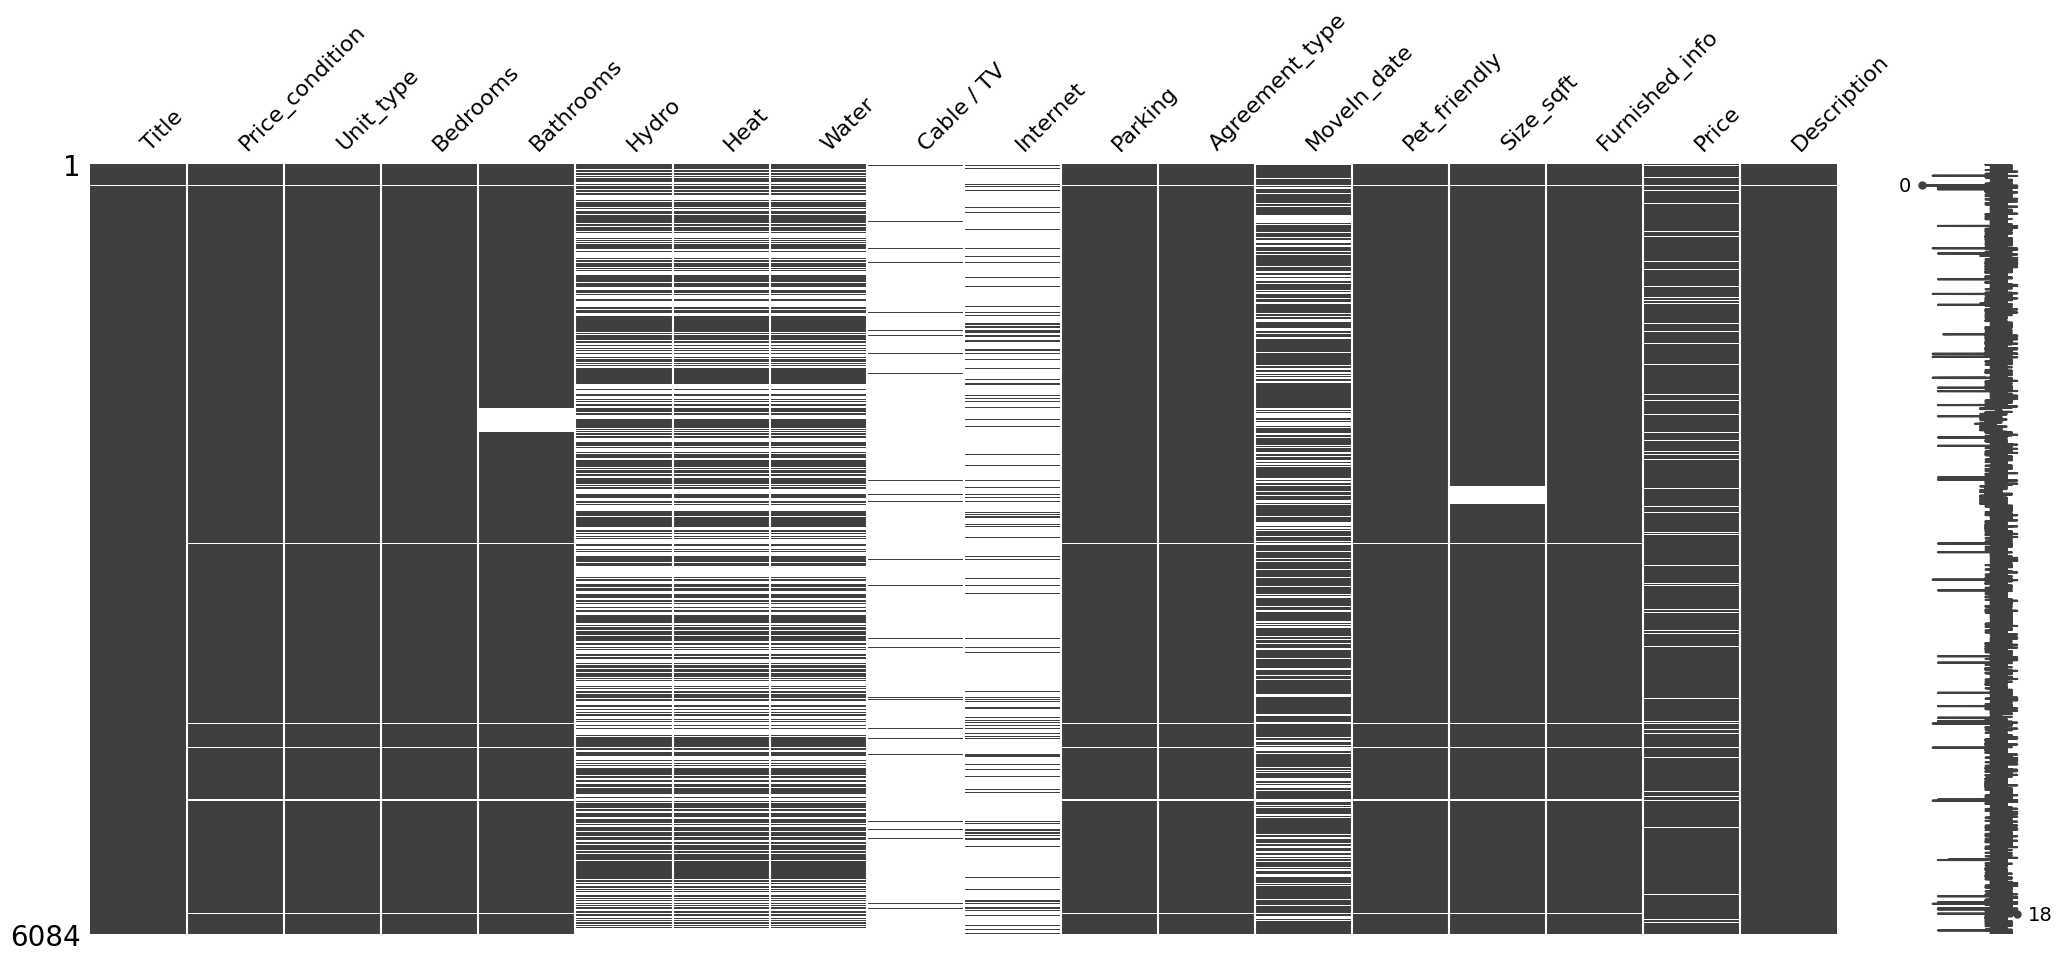

In [11]:
#visualize the null values
# !pip install missingno

msno.matrix(df)


In [12]:
# To check all unique values and their counts

unique_val_check_colomns = ['Price_condition','Size_sqft', 'Unit_type', 'Bedrooms', 'Bathrooms', 
                    'Hydro', 'Heat', 'Water', 'Parking','Cable / TV','Internet',
                    'Furnished_info', 'Pet_friendly','Agreement_type']

for column in unique_val_check_colomns:
    print(column + ': \n', df[column].value_counts(),'\n------------------------------------------------------------------------\n')
    

Price_condition: 
 Price_condition
No Utilities Included      2521
Some Utilities Included    2325
All Utilities Included     1189
Name: count, dtype: int64 
------------------------------------------------------------------------

Size_sqft: 
 Size_sqft
Not Available    1041
1,000             335
800               219
900               203
700               202
                 ... 
1,225               1
809                 1
298                 1
9,100               1
1,130               1
Name: count, Length: 816, dtype: int64 
------------------------------------------------------------------------

Unit_type: 
 Unit_type
Apartment         2986
Basement           916
House              901
Condo              695
Townhouse          343
Duplex/Triplex     190
Not Available        4
Name: count, dtype: int64 
------------------------------------------------------------------------

Bedrooms: 
 Bedrooms
Bedrooms: 2                  1865
Bedrooms: 1                  1799
Bedrooms: 3    

In [13]:
removal_items= ['Bathrooms: 2','Bathrooms: 1.5','Bathrooms: 2.5','Bathrooms: 3','Bathrooms: 3.5']
index = df.index[df['Bedrooms'].isin(removal_items)]
df.drop(index=index,inplace=True)


In [14]:
## Water, Hydro,Heat, Internet and CableTv are the utilities. More than half of the data is missing. Instead of using indivival utilities, the other column 'Utility_included' is considering for further analysis.
##Hence individual utilities are dropped from the dataset

df.drop(columns=['Hydro','Water','Heat','Cable / TV','Internet'], inplace=True)

# Handling missing values
# Majority of the data is missing  in 'MoveIn_date' & 'Agreement_type' and it is not a big factor associated with house rentals
df.drop(columns=['MoveIn_date','Agreement_type'], inplace=True)

In [15]:
## Handle missing values
## We drop the rows having missing values except for 'Size_sqft'

df.dropna( subset = [ 'Title' , 'Price_condition' , 'Unit_type' , 'Bedrooms','Bathrooms','Parking','Pet_friendly','Furnished_info','Price','Description'] , inplace = True )

In [16]:
#find the number of Unit_type have value 'Not Available'
len(df[df['Unit_type']=='Not Available'])

3

In [17]:
#in this dataset Not available can be cosider as null value.So we drop  those rows. 
df.drop(df[df['Unit_type'] == 'Not Available'].index, inplace=True)

# Replacing values in bedroom to numerical currespoding values
df['Bedrooms'].replace(['Bedrooms: Bachelor/Studio',
                        'Bedrooms: 1','Bedrooms: 1 + Den',
                        'Bedrooms: 2','Bedrooms: 2 + Den',
                        'Bedrooms: 3' , 'Bedrooms: 3 + Den',
                        'Bedrooms: 4','Bedrooms: 4 + Den',
                        'Bedrooms: 5+'],[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], inplace=True)

# Replacing values in bathroom to numerical curresponding values
df['Bathrooms'].replace(['Bathrooms: 1' ,'Bathrooms: 1.5' ,'Bathrooms: 2' ,
                         'Bathrooms: 2.5','Bathrooms: 3', 'Bathrooms: 3.5' ,
                         'Bathrooms: 4' ,'Bathrooms: 4.5','Bathrooms: 5','Bathrooms: 6+'],
                          [1,1.5,2,2.5,3,3.5,4,4.5,5,6],inplace=True)

#replacing values in parrking to numerical curresponding values
df['Parking'].replace(['3+'],['3'],inplace=True)

#convert type of parking to integer type
df['Parking']=df['Parking'].astype(int)

C:\Users\sudhy\AppData\Local\Temp\ipykernel_26704\4217431051.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bedrooms'].replace(['Bedrooms: Bachelor/Studio',
C:\Users\sudhy\AppData\Local\Temp\ipykernel_26704\4217431051.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Bedrooms'].replac

In [18]:
#Checking the percet of the column 'Size_sqft' having values null or Not Available
print('Count of Not Available: ',(df["Size_sqft"]=='Not Available').sum())
print('Count of null values: ',df['Size_sqft'].isnull().sum())
x= ((df["Size_sqft"]=='Not Available').sum())+(df['Size_sqft'].isnull().sum())
null_percent=(x/df.shape[0])*100
print("Null percent: ",null_percent)

Count of Not Available:  939
Count of null values:  141
Null percent:  19.536903039073806


<Axes: >

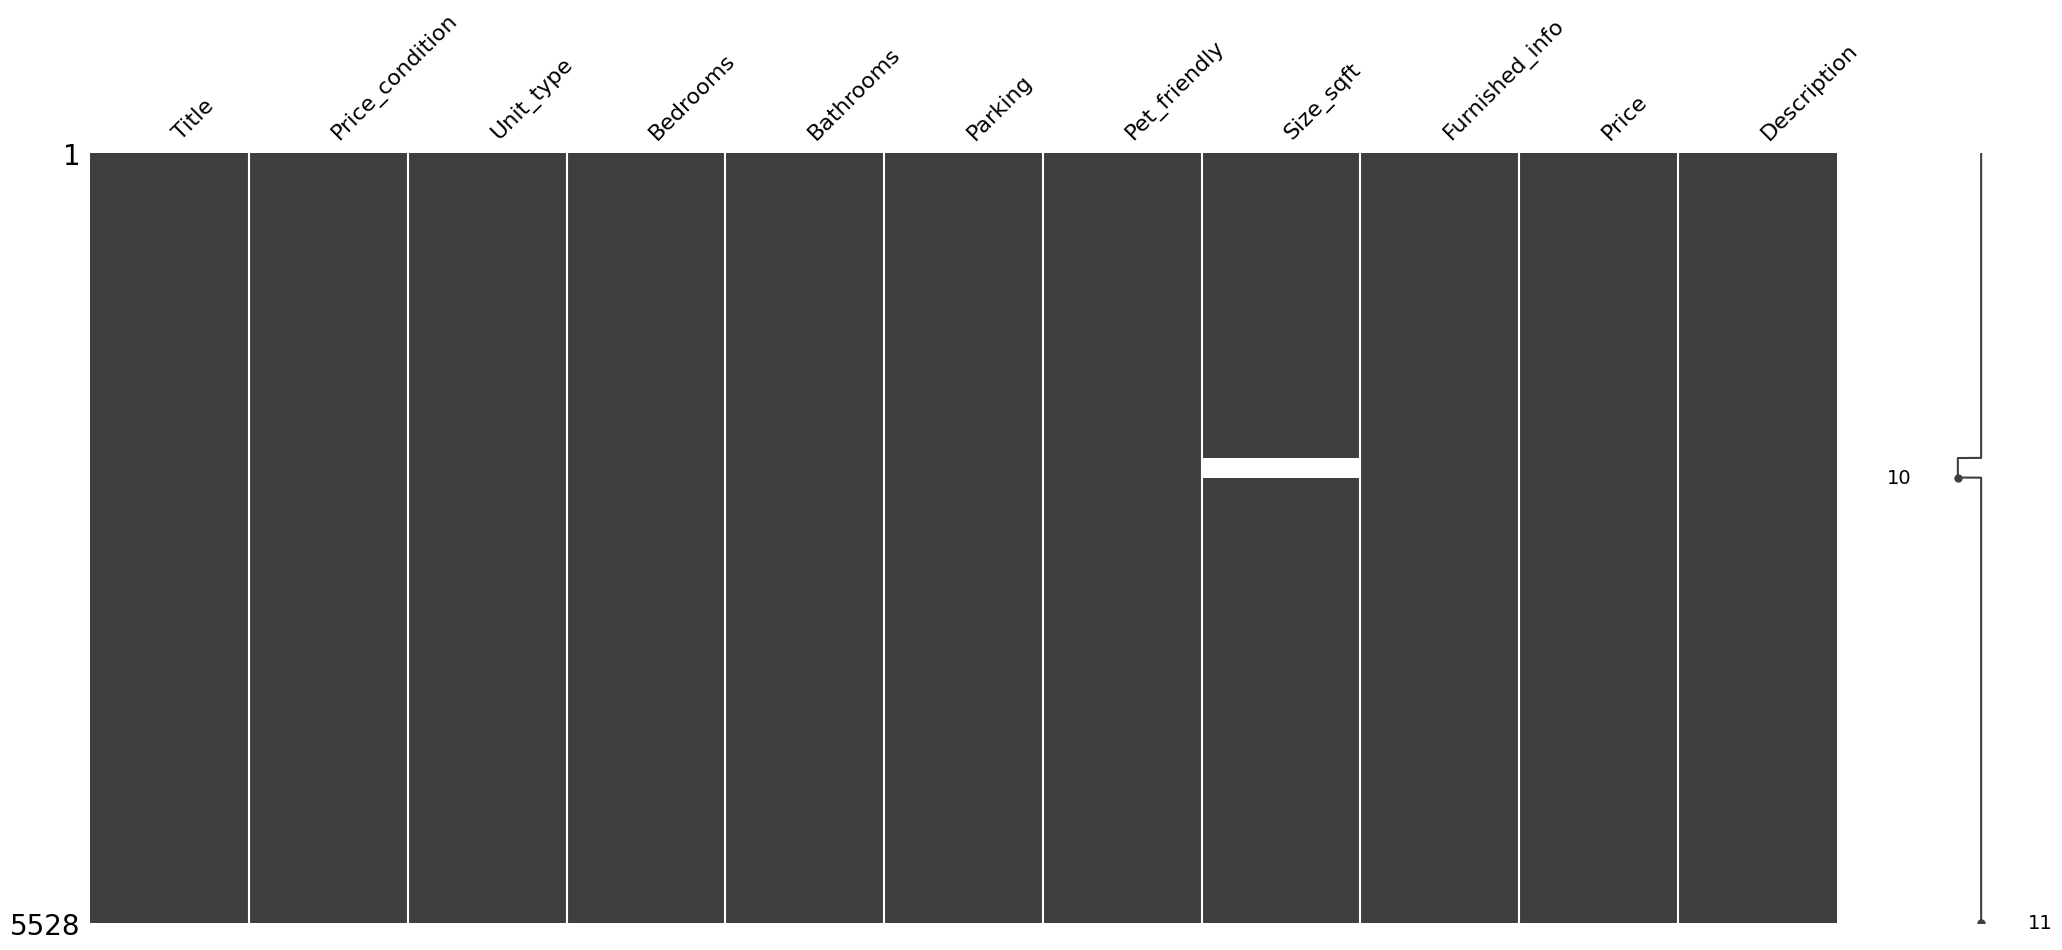

In [19]:
# Visualize the missing values
import missingno as msno
msno.matrix(df)


In [20]:
# Convert 'Not Available' as Null value
df['Size_sqft'] = df['Size_sqft'].replace('Not Available', np.nan)

## Convert size_sqrt into int type
def size_int_converter(value):
    if isinstance(value, str):
        return int(value.replace(",", ""))
    elif isinstance(value, int):
        return value
    else:
        return np.nan
    
df['Size_sqft'] = df['Size_sqft'].apply(size_int_converter)

In [21]:
#Get the basin info about dataset after some cleaning process
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5528 entries, 0 to 11075
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5528 non-null   object 
 1   Price_condition  5528 non-null   object 
 2   Unit_type        5528 non-null   object 
 3   Bedrooms         5528 non-null   float64
 4   Bathrooms        5528 non-null   float64
 5   Parking          5528 non-null   int32  
 6   Pet_friendly     5528 non-null   object 
 7   Size_sqft        4448 non-null   float64
 8   Furnished_info   5528 non-null   object 
 9   Price            5528 non-null   float64
 10  Description      5528 non-null   object 
dtypes: float64(4), int32(1), object(6)
memory usage: 496.7+ KB


In [22]:
##Missing value imputation using KNNImputer

import pandas as pd
from sklearn.impute import KNNImputer

# Create a dataframe having only the features for imputation
features = df[['Bathrooms', 'Bedrooms', 'Price','Size_sqft']]

imputer = KNNImputer(n_neighbors=2)

# Fit and transform the features
imputed_features = imputer.fit_transform(features)

# Convert the imputed features back to a DataFrame
imputed_features_df = pd.DataFrame(imputed_features, columns=features.columns)

# Replace missing values in the original 'Size_sqft' column with the imputed values
df['Size_sqft'] = df['Size_sqft'].fillna(imputed_features_df['Size_sqft'])

# Display the DataFrame with imputed values
df.isnull().sum()


Title                0
Price_condition      0
Unit_type            0
Bedrooms             0
Bathrooms            0
Parking              0
Pet_friendly         0
Size_sqft          432
Furnished_info       0
Price                0
Description          0
dtype: int64

In [23]:
#droping the remaining nullvalues
df.dropna( subset = [ 'Size_sqft'] , inplace = True )

#checking the null values again
df.isna().sum()

Title              0
Price_condition    0
Unit_type          0
Bedrooms           0
Bathrooms          0
Parking            0
Pet_friendly       0
Size_sqft          0
Furnished_info     0
Price              0
Description        0
dtype: int64

In [24]:
#dataset after removing missing values
df.shape

(5096, 11)

In [25]:
df.groupby('Unit_type')[['Bedrooms', 'Bathrooms', 'Parking']].apply(lambda x: x.mode().iloc[0])

0               Bedrooms  Bathrooms  Parking
Unit_type                                   
Apartment            1.0        1.0      0.0
Basement             2.0        1.0      1.0
Condo                1.0        1.0      1.0
Duplex/Triplex       2.0        1.0      1.0
House                3.0        1.0      2.0
Townhouse            3.0        2.5      2.0

In [26]:
df.groupby('Bedrooms').apply(lambda x:x.count())

C:\Users\sudhy\AppData\Local\Temp\ipykernel_26704\2088071149.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Bedrooms').apply(lambda x:x.count())


Title  Price_condition  Unit_type  Bedrooms  Bathrooms  Parking  \
Bedrooms                                                                    
0.5         301              301        301       301        301      301   
1.0        1583             1583       1583      1583       1583     1583   
1.5         321              321        321       321        321      321   
2.0        1595             1595       1595      1595       1595     1595   
2.5         192              192        192       192        192      192   
3.0         718              718        718       718        718      718   
3.5          98               98         98        98         98       98   
4.0         206              206        206       206        206      206   
4.5          19               19         19        19         19       19   
5.0          63               63         63        63         63       63   

          Pet_friendly  Size_sqft  Furnished_info  Price  Description  
Bedrooms                                                               
0.5                301        301             301    301          301  
1.0               1583       1583            1583   1583         1583  
1.5                321        321             321    321          321  
2.0               1595       1595            1595   1595         1595  
2.5                192        192             192    192          192  
3.0                718        718             718    718          718  
3.5                 98         98              98     98           98  
4.0                206        206             206    206          206  
4.5                 19         19              19     19           19  
5.0                 63         63              63     63           63

In [27]:
pd.crosstab(df['Bedrooms'],df['Bathrooms'],margins=True,margins_name='Total')

Bathrooms   1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  6.0  Total
Bedrooms                                                           
0.5         297    1    2    1    0    0    0    0    0    0    301
1.0        1558   14    9    1    1    0    0    0    0    0   1583
1.5         273   12   36    0    0    0    0    0    0    0    321
2.0        1200   71  301   16    7    0    0    0    0    0   1595
2.5          90   15   85    2    0    0    0    0    0    0    192
3.0         285   91  156  121   59    5    1    0    0    0    718
3.5          11    6   27   31   19    3    1    0    0    0     98
4.0          16   10   45   46   36   28   24    1    0    0    206
4.5           2    2    3    4    4    2    1    1    0    0     19
5.0           0    2   23    7   11    8    7    2    2    1     63
Total      3732  224  687  229  137   46   34    4    2    1   5096

In [28]:
pd.crosstab(df['Bedrooms'],df['Unit_type'],margins=True,margins_name='Total')

Unit_type  Apartment  Basement  Condo  Duplex/Triplex  House  Townhouse  Total
Bedrooms                                                                      
0.5              203        57     32               3      5          1    301
1.0              993       282    191              32     64         21   1583
1.5               91        66    143               4     15          2    321
2.0              911       303    187              64     92         38   1595
2.5               49        47     55               8     28          5    192
3.0              170        32     23              42    283        168    718
3.5                9         4      1               3     50         31     98
4.0               20         5      2               4    148         27    206
4.5                1         0      0               0     16          2     19
5.0                3         0      2               3     52          3     63
Total           2450       796    636             163    753        298   5096

In [29]:
pd.crosstab(df['Pet_friendly'],df['Unit_type'],margins=True,margins_name='Total')

Unit_type     Apartment  Basement  Condo  Duplex/Triplex  House  Townhouse  \
Pet_friendly                                                                 
Limited             731       108    188              68    230         80   
No                  635       634    269              47    374        150   
Yes                1084        54    179              48    149         68   
Total              2450       796    636             163    753        298   

Unit_type     Total  
Pet_friendly         
Limited        1405  
No             2109  
Yes            1582  
Total          5096

## 3.Plotting techniques

In [30]:
#Drawing histogram for numerical variables(Bedrooms, bathrooms, size_sqrt,price)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import plotly.express as px

In [31]:
# Group by Unit_type and count the occurrences of number of Bedrooms
grouped = df.groupby(['Unit_type', 'Bedrooms']).size().reset_index(name='count')

fig = px.bar(grouped, x='Unit_type', y='count', color='Bedrooms',
             title='Count of Bedrooms by Unit Type',
             labels={'count': 'Count', 'Unit_type': 'Unit Type'})
fig.show()


# Group by Unit_type and count the number of bathrooms
grouped = df.groupby(['Unit_type', 'Bathrooms']).size().reset_index(name='count')
fig = px.bar(grouped, x='Unit_type', y='count', color='Bathrooms',
             title='Count of Bathrooms by Unit Type',
             labels={'count': 'Count', 'Unit_type': 'Unit Type'})
fig.show()


# Group by Unit_type and count number of parking
df['Parking'] = df['Parking'].astype('category')
grouped = df.groupby(['Unit_type', 'Parking']).size().reset_index(name='count')

fig = px.bar(grouped, x='Unit_type', y='count', color='Parking',
             title='Count of Parking by Unit Type',
             labels={'count': 'Count', 'Unit_type': 'Unit Type'})
fig.show()




C:\Users\sudhy\AppData\Local\Temp\ipykernel_26704\3459213527.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [32]:
grouped = df.groupby(['Unit_type', 'Pet_friendly']).size().reset_index(name='count')

# Plotting
fig = px.bar(grouped, x='Unit_type', y='count', color='Pet_friendly',
             title='Count of Pet Friendly by Unit Type',
             labels={'count': 'Count', 'Unit_type': 'Unit Type', 'Pet_friendly': 'Pet Friendly'})
fig.show()


In [33]:
## Plot the Furnished_type By Unit_types

grouped = df.groupby(['Unit_type', 'Furnished_info']).size().reset_index(name='count')

fig = px.pie(grouped, values='count', names='Furnished_info', title='Count of Furnished info by Unit Type',
             labels={'count': 'Count', 'Furnished_info': 'Furnished_info'}, color='Furnished_info', 
             facet_col='Unit_type', facet_col_wrap=2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

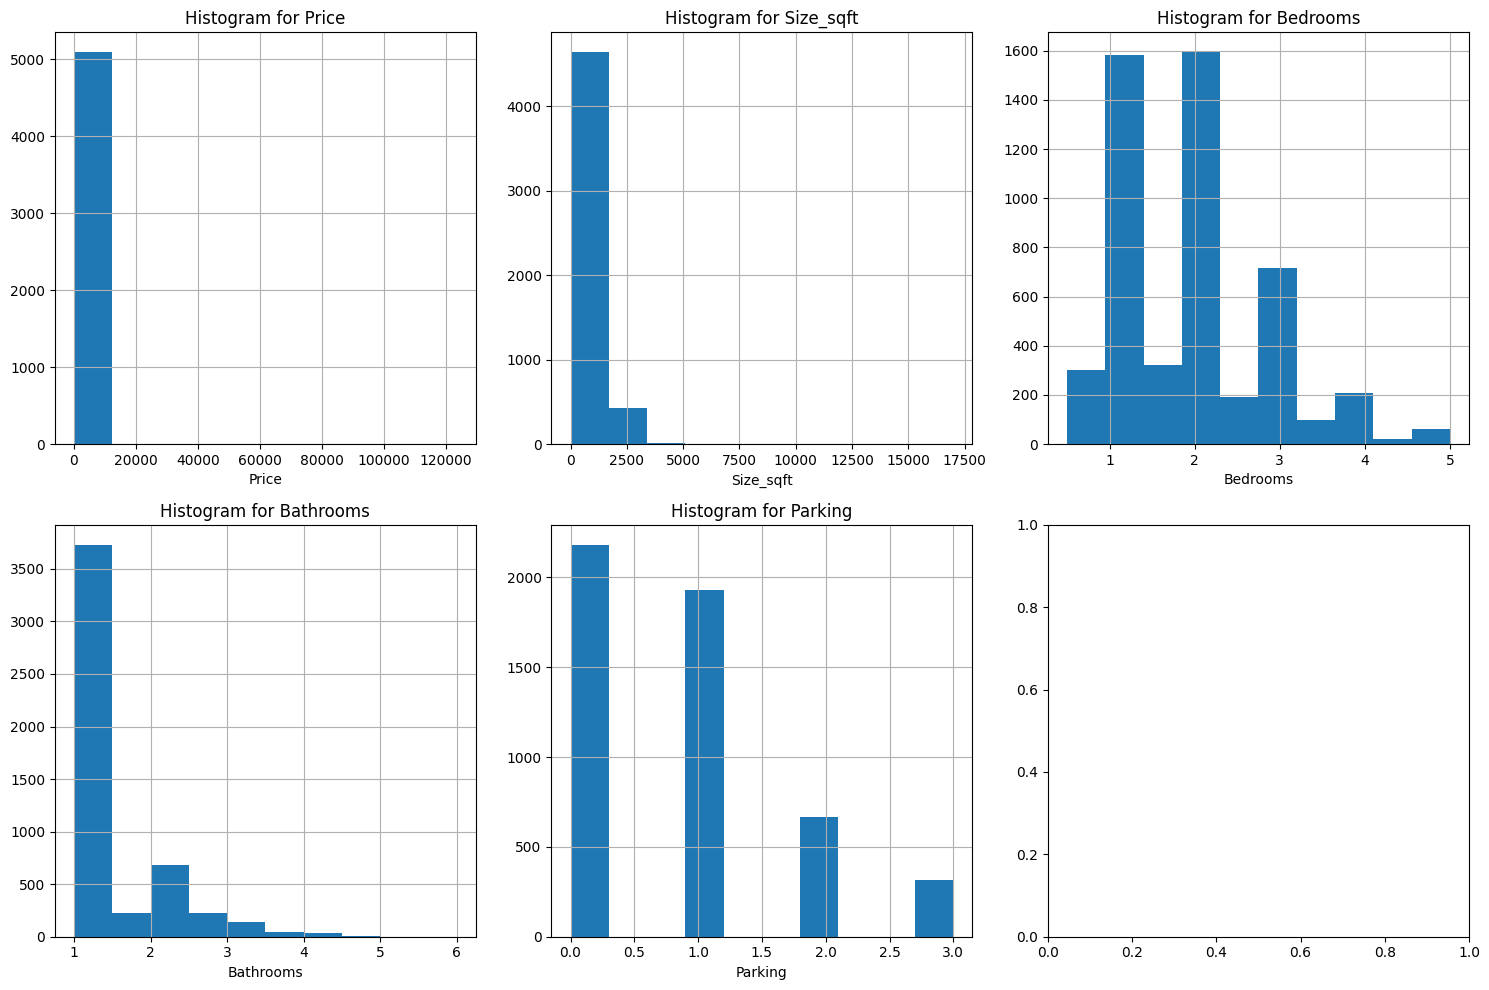

In [34]:
## Plotting histogram of each numerical variable

columns=['Price','Size_sqft','Bedrooms','Bathrooms','Parking']
fig,axs=plt.subplots(2,3, figsize=(15,10))
axs=axs.flatten()

#plt.figure(facecolor='grid',figsize=(20,15))
for i, col in enumerate(columns):
    ax=axs[i]
    df[col].hist(bins=10,ax=ax)

    ax.set_title(f'Histogram for {col}')
    ax.set_xlabel(col)
    
plt.tight_layout()
plt.show()




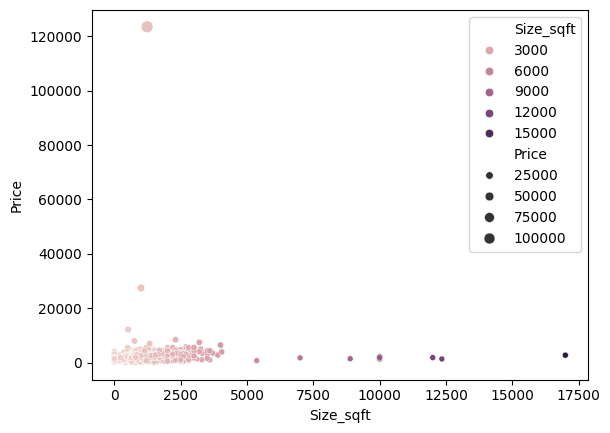

In [35]:
#Scatter plot of Price and Size_sqft
sns.scatterplot(x='Size_sqft', y='Price', data=df,hue='Size_sqft',size='Price')
plt.show()

## It is clear that both Price as well as Size_sqft has outliers

In [36]:
#Correlation matrix
plt.figure(figsize=(3,3))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')


ValueError: could not convert string to float: 'Forest Hill Residences - 3 Bedroom Apartment for Rent'

<Figure size 300x300 with 0 Axes>

In [ ]:
sns.pairplot(data=df, hue='Unit_type')

In [ ]:
sns.pairplot(data=df, hue='Bedrooms')

In [ ]:
#checkig for outliers
plt.figure(num= None, figsize=(10,10), dpi=1000, facecolor="White")
df.plot(kind ="box")
plt.show()

In [ ]:
## Boxplot for each type of unit in the X axis and the price in the Y axis
plt.figure( figsize = ( 10 , 6 ) ) 
sns.boxplot( x = "Unit_type" , y = "Price" , data = df )
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure( figsize = ( 10 , 6 ) ) 
sns.boxplot( x = "Bedrooms" , y = "Price" , data = df )
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.pairplot(df)

## 4. Pandas Profiling and Making Profiling Report

In [ ]:

# import pandas as pd
# from ydata_profiling import ProfileReport


# profile = ProfileReport(df, title="Profiling Report")

In [ ]:
# profile.to_widgets()
# profile.to_file('output.html')

## 5. Encoding categorical Columns

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
#label encoding with Yes/No values (Furnished_info)
label_mapping={'Yes':1,'No':0}
df['Encoded_Furnished_info']=df['Furnished_info'].map(label_mapping)

#encoding for ordinal category variables
price_condition_ord_map={'No Utilities Included':1,'Some Utilities Included':2, 
                         'All Utilities Included':3}
pet_friendly_ord_map={'No':1,'Limited': 2 ,'Yes':3}

df['encoded_price_condition']=df['Price_condition'].map(price_condition_ord_map)
df['encoded_pet_friendly']=df['Pet_friendly'].map(pet_friendly_ord_map)

#One-Hot Encoding to create binary columns for nominal category variable unit_type
encoded=pd.get_dummies(df['Unit_type'],prefix='Unit_type')
df=pd.concat([df,encoded],axis=1)



In [39]:
pd.set_option('display.max_columns', None)
df.head()

Title          Price_condition  \
0  Forest Hill Residences - 3 Bedroom Apartment f...  Some Utilities Included   
1  569 Broadview Ave - Broadview Mansions at 569 ...    No Utilities Included   
2  Split-Level 2 Bedroom, Etobicoke!  Dundas St. ...  Some Utilities Included   
3  2 Bedroom Apartment in Kitchener - all inclusive!   All Utilities Included   
4     NEWLY RENOVATED 1 BEDROOM SUITE AVAILABLE NOW!  Some Utilities Included   

   Unit_type  Bedrooms  Bathrooms Parking Pet_friendly  Size_sqft  \
0  Apartment       3.0        1.0       0          Yes     2026.0   
1  Apartment       0.5        1.0       0          Yes      425.0   
2  Apartment       2.0        1.0       0          Yes      831.0   
3  Apartment       2.0        1.0       1           No      950.0   
4  Apartment       1.0        1.0       0          Yes      834.0   

  Furnished_info   Price                                        Description  \
0             No  4500.0  Description\nNewly renovated 3-bedroom unit wi...   
1             No  2099.0  Description\nBroadview Mansions at 569 Broadvi...   
2             No  2275.0  Description\nRealstar's 5062-5078 Dundas Stree...   
3             No  2125.0  Description\nAre you looking for a modern, cle...   
4             No  1895.0  Description\n1 Bed, 1 Bath, Spacious, Newly Re...   

   Encoded_Furnished_info  encoded_price_condition  encoded_pet_friendly  \
0                       0                        2                     3   
1                       0                        1                     3   
2                       0                        2                     3   
3                       0                        3                     1   
4                       0                        2                     3   

   Unit_type_Apartment  Unit_type_Basement  Unit_type_Condo  \
0                 True               False            False   
1                 True               False            False   
2                 True               False            False   
3                 True               False            False   
4                 True               False            False   

   Unit_type_Duplex/Triplex  Unit_type_House  Unit_type_Townhouse  
0                     False            False                False  
1                     False            False                False  
2                     False            False                False  
3                     False            False                False  
4                     False            False                False

In [40]:
#Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')

ValueError: could not convert string to float: 'Forest Hill Residences - 3 Bedroom Apartment for Rent'

<Figure size 1000x1000 with 0 Axes>

## 6. Identify and correct Outliers

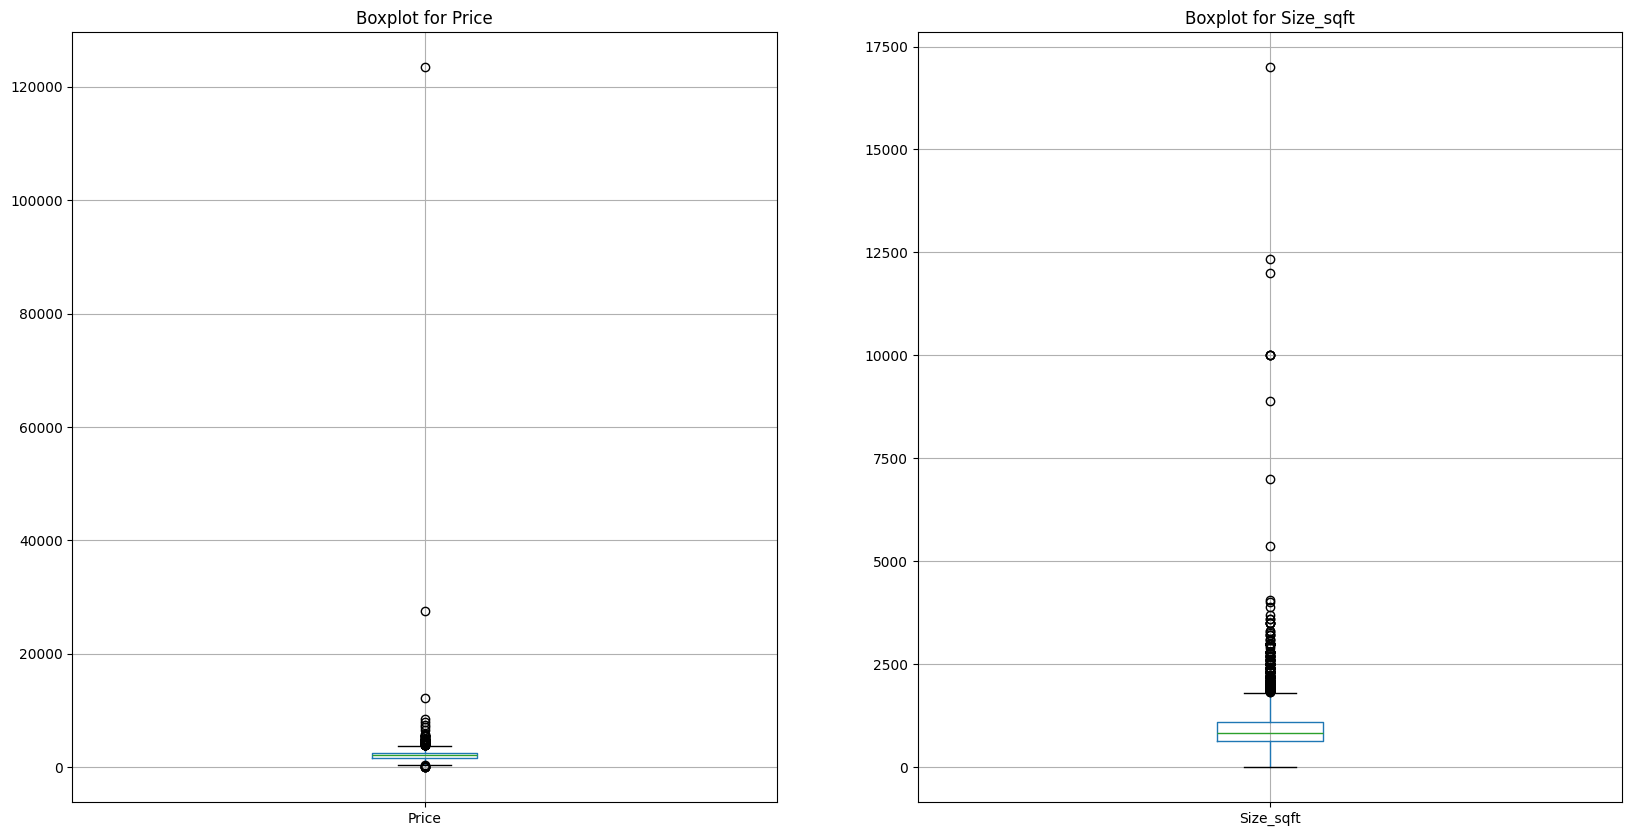

In [41]:
#drawing boxplot for each column
columns = ['Price' , 'Size_sqft']
plt.figure(figsize = (20, 10))
for i , col in enumerate( columns ):
    # Plotting various columns to analyse and see outliers
    plt.subplot( 1 , 2 , i + 1 )
    df.boxplot(column=col)
    plt.title("Boxplot for %s"%col)
plt.show()

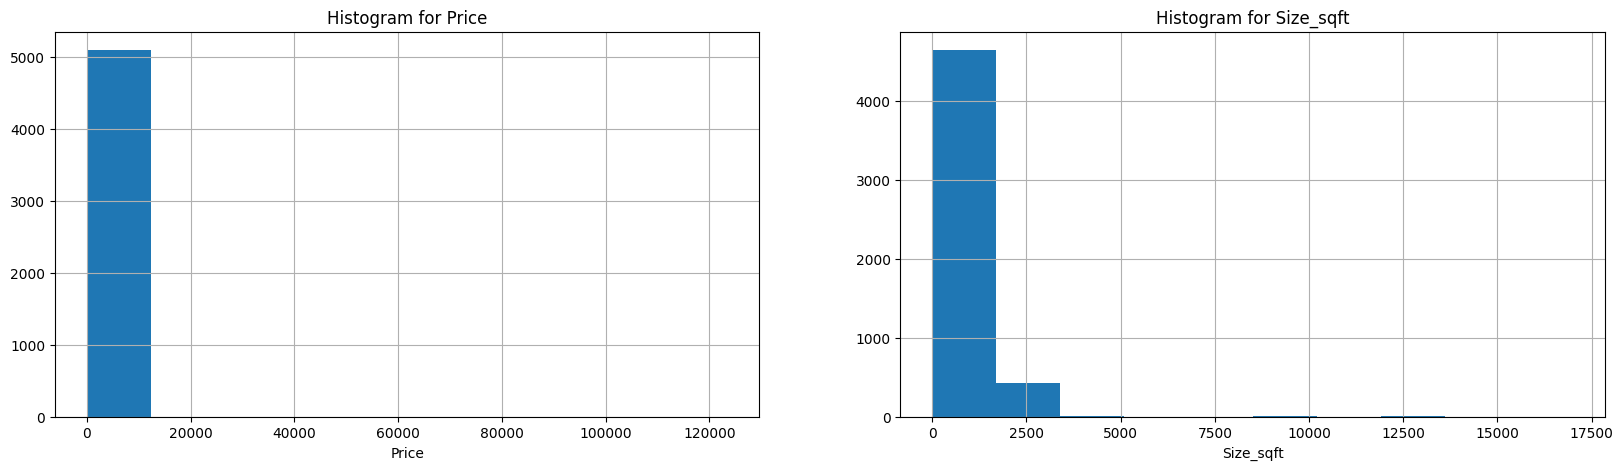

In [42]:
# Histogram of each column
columns = [ 'Price', 'Size_sqft' ]
plt.figure(figsize = (20, 5))
for i , col in enumerate( columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 1 , 2 , i + 1 )
    df[col].hist(bins = 10)
    plt.title("Histogram for %s"%col)
    plt.xlabel(col)
plt.show()

## it is clear that price and size_sqft having outliers

Text(0, 0.5, 'Price')

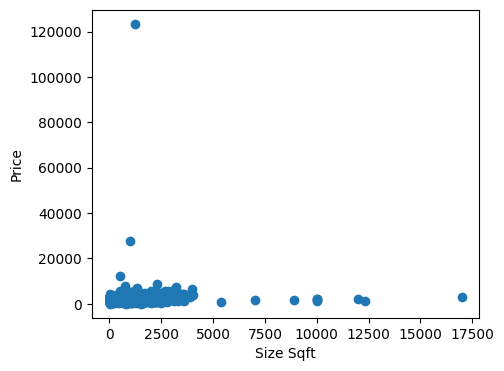

In [43]:
#using scatterplots 
fig,ax=plt.subplots(figsize=(5,4))
ax.scatter(df['Size_sqft'],df['Price'])
ax.set_xlabel('Size Sqft')
ax.set_ylabel('Price')

In [44]:
#outlier detection-IQR
use_columns = [ 'Price', 'Size_sqft' ]
q1=df[use_columns].quantile(0.25)
q3=df[use_columns].quantile(0.75)
IQR=q3-q1
Lower_Whisker=q1-(1.5*IQR)
Upper_Whisker=q3+(1.5*IQR)
print("First quartile for each use column :")
print( q1 )
print("\nThird quartile for each use column :")
print( q3 )
print("\nInterquartile Range for each use column :")
print( IQR )
print("\nLower Whisker for each use column :")
print( Lower_Whisker )
print("\nUpper Whisker for each use column :")
print( Upper_Whisker )
outliers_finder = ((df[use_columns] < Lower_Whisker) | (df[use_columns] > Upper_Whisker) ).any(axis=1)
outliers_result = df[outliers_finder]
#the outliers present in the dataset
print("\n\nnumber of outliers: ",outliers_result.shape[0])

First quartile for each use column :
Price        1700.0
Size_sqft     630.0
Name: 0.25, dtype: float64

Third quartile for each use column :
Price        2556.75
Size_sqft    1100.00
Name: 0.75, dtype: float64

Interquartile Range for each use column :
Price        856.75
Size_sqft    470.00
dtype: float64

Lower Whisker for each use column :
Price        414.875
Size_sqft    -75.000
dtype: float64

Upper Whisker for each use column :
Price        3841.875
Size_sqft    1805.000
dtype: float64


number of outliers:  425


In [45]:
#dataset with removed outliers 
removed_outlier= ( (df[use_columns] >= Lower_Whisker) & (df[use_columns] <= Upper_Whisker) ).all(axis=1)
df_removed_outlier=df[removed_outlier]
print('Count of df after removing  outlier: ',df_removed_outlier.shape[0])

Count of df after removing  outlier:  4671


Since the number of Outliers are high, It is not the good practice to simply eliminate all.

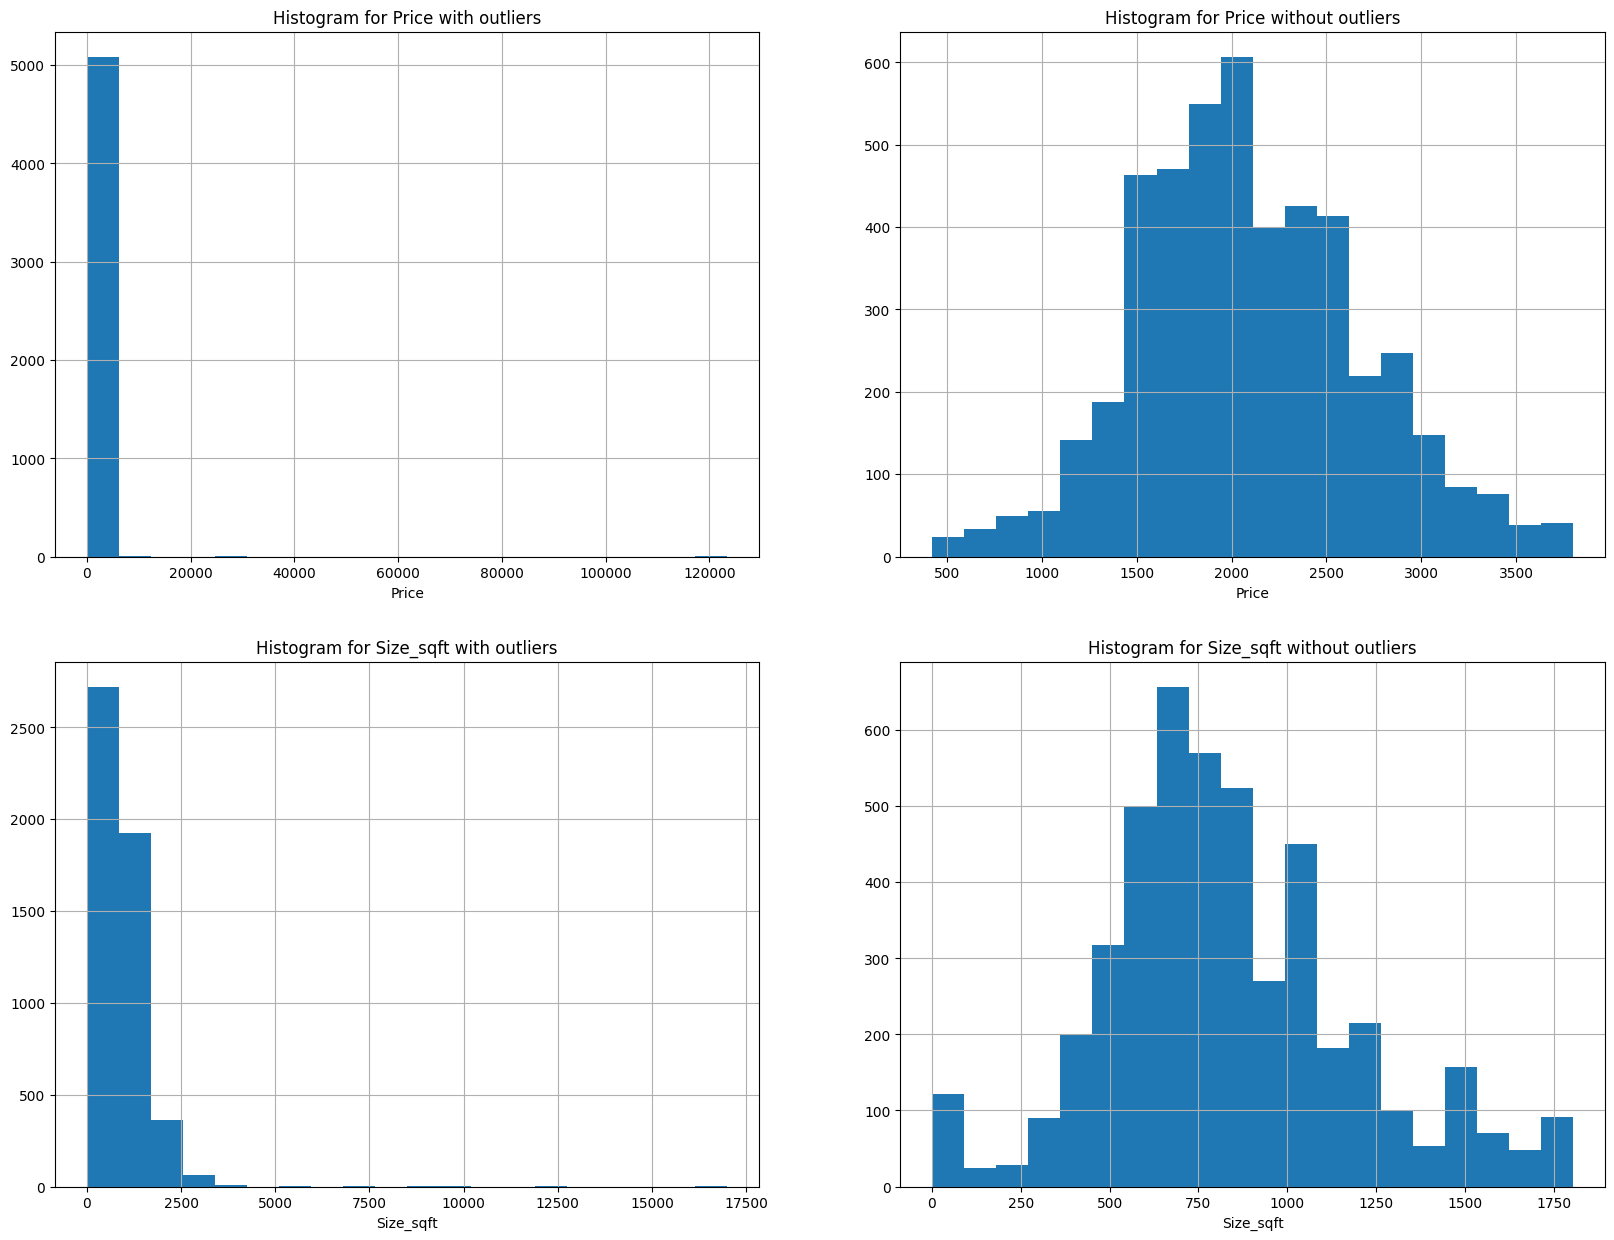

In [46]:
### Drawing histogram for each column for data with and without outliers
columns = [ 'Price' ,'Size_sqft']
plt.figure(figsize = (20, 15))
for i , col in enumerate( columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 2 , 2 , 2*i + 1 )
    df[col].hist(bins = 20)
    plt.title("Histogram for %s with outliers"%col)
    plt.xlabel(col)
    # Plotting various columns to demonstrate distributions
    plt.subplot( 2 , 2 , 2*i + 2 )
    df_removed_outlier[col].hist(bins = 20)
    plt.title("Histogram for %s without outliers"%col)
    plt.xlabel(col)
plt.show()

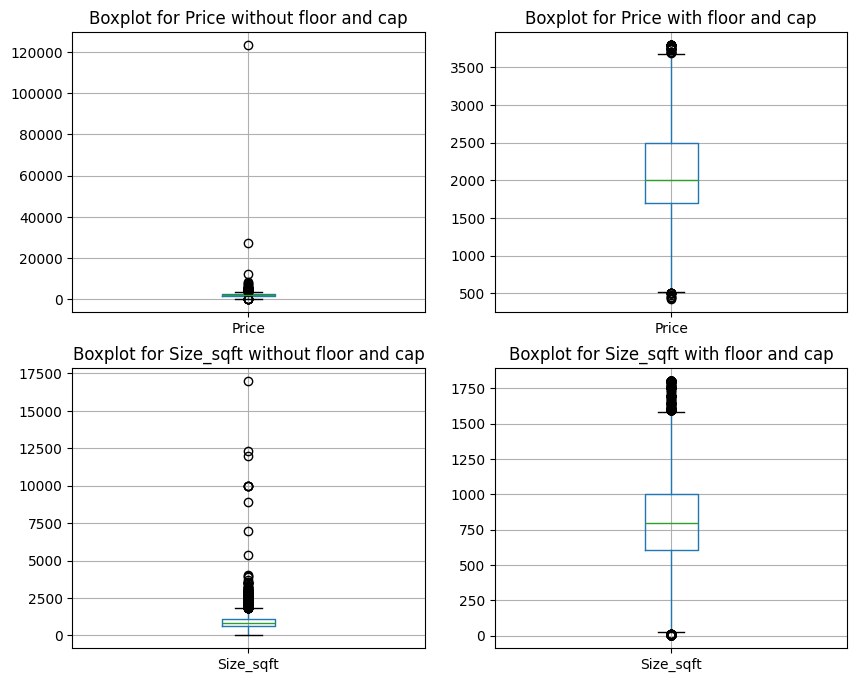

In [47]:
## Compare using Boxplot
use_columns = [ 'Price','Size_sqft' ]
plt.figure(figsize = (10, 8))
for i , col in enumerate( use_columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 2 , 2 , 2*i + 1 )
    df.boxplot(column=col)
    plt.title("Boxplot for %s without floor and cap"%col)
    #plt.xlabel(col)
    # Plotting various columns to demonstrate distributions
    plt.subplot( 2 , 2 , 2*i + 2 )
    df_removed_outlier.boxplot(column=col)
    plt.title("Boxplot for %s with floor and cap"%col)
    #plt.xlabel(col)
plt.show()

Text(0.5, 1.0, 'SCatterplot with outlier removal')

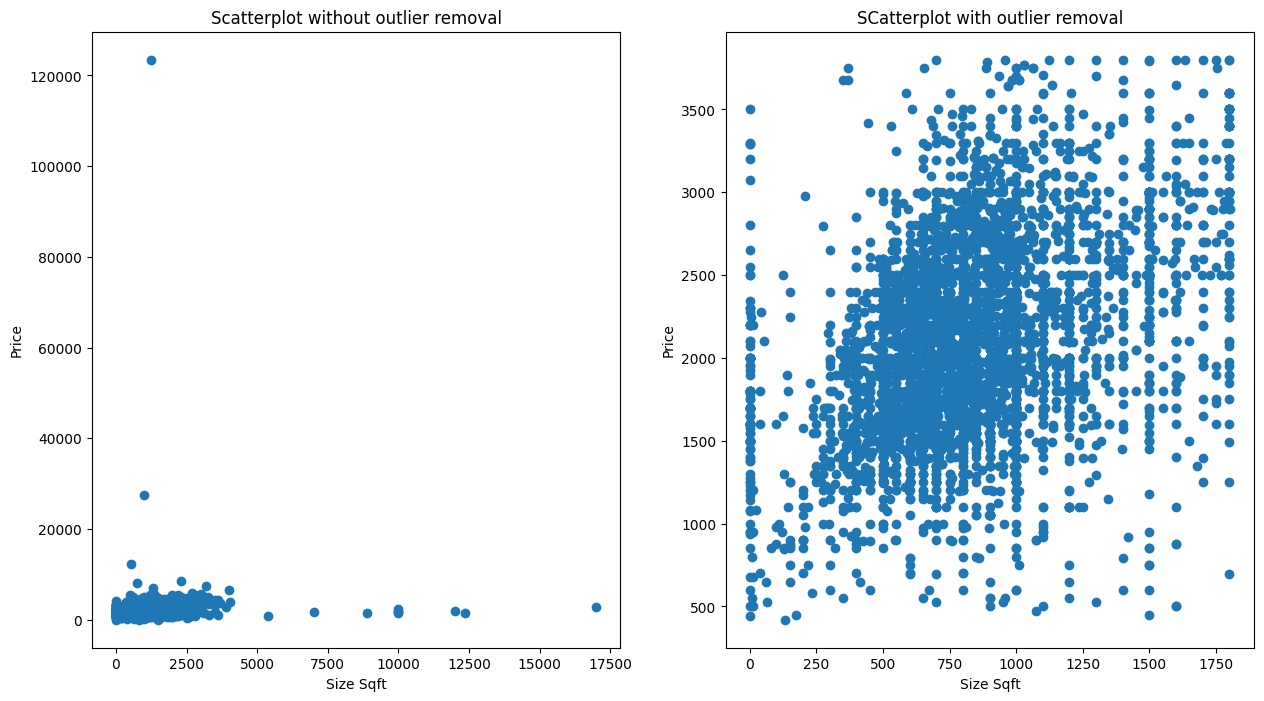

In [48]:
#scatter plot after removing outlier
#using scatterplots 
fig,ax=plt.subplots(1,2, figsize=(15,8))
ax[0].scatter(df['Size_sqft'],df['Price'])
ax[0].set_xlabel('Size Sqft')
ax[0].set_ylabel('Price')
ax[0].set_title('Scatterplot without outlier removal')


ax[1].scatter(df_removed_outlier['Size_sqft'],df_removed_outlier['Price'])
ax[1].set_xlabel('Size Sqft')
ax[1].set_ylabel('Price')
ax[1].set_title('SCatterplot with outlier removal')

## 7. Quntile based flooring& capping, Trimming and Log Transformation 

### 7.1 Quantile based flooring and capping


In [49]:

use_columns = [ 'Price','Size_sqft' ]
floor = df[use_columns].quantile(0.01)
cap   = df[use_columns].quantile(0.99)

print('floor:\n',floor)
print('cap:\n',cap)

floor_cap = ((df[use_columns] > floor) & (df[use_columns] < cap) ).all(axis=1)
floor_cap_df = df[floor_cap]
print('\nShape of floor_cap_df:',floor_cap_df.shape)
print('\nShape of df:',df.shape)


floor:
 Price        673.75
Size_sqft      1.00
Name: 0.01, dtype: float64
cap:
 Price        4487.65
Size_sqft    3000.00
Name: 0.99, dtype: float64

Shape of floor_cap_df: (4851, 20)

Shape of df: (5096, 20)


In [50]:
floor_cap_df.shape

(4851, 20)

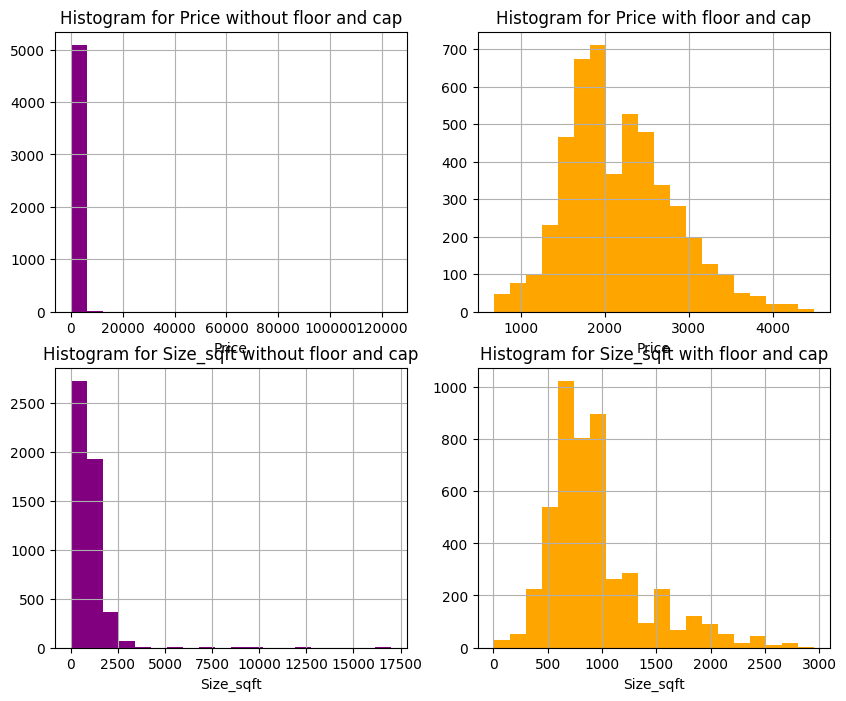

In [51]:
### Drawing histogram for price and size_sqft
use_columns = [ 'Price','Size_sqft' ]
plt.figure(figsize = (10, 8))
for i , col in enumerate(use_columns):
    
    # Plotting histogram to  demonstrate distributions
    plt.subplot( 2 , 2 , 2*i + 1 )
    df[col].hist(bins = 20, color='purple')
    plt.title("Histogram for %s without floor and cap"%col)
    plt.xlabel(col)
    
    # Plotting histogram  to demonstrate distributions
    plt.subplot( 2 , 2 , 2*i + 2 )
    floor_cap_df[col].hist(bins = 20,color='orange')
    plt.title("Histogram for %s with floor and cap"%col)
    plt.xlabel(col)
plt.show()

C:\Users\sudhy\AppData\Local\Temp\ipykernel_26704\1018960296.py:4: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

C:\Users\sudhy\AppData\Local\Temp\ipykernel_26704\1018960296.py:10: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



Text(0.5, 1.0, 'With floor cap')

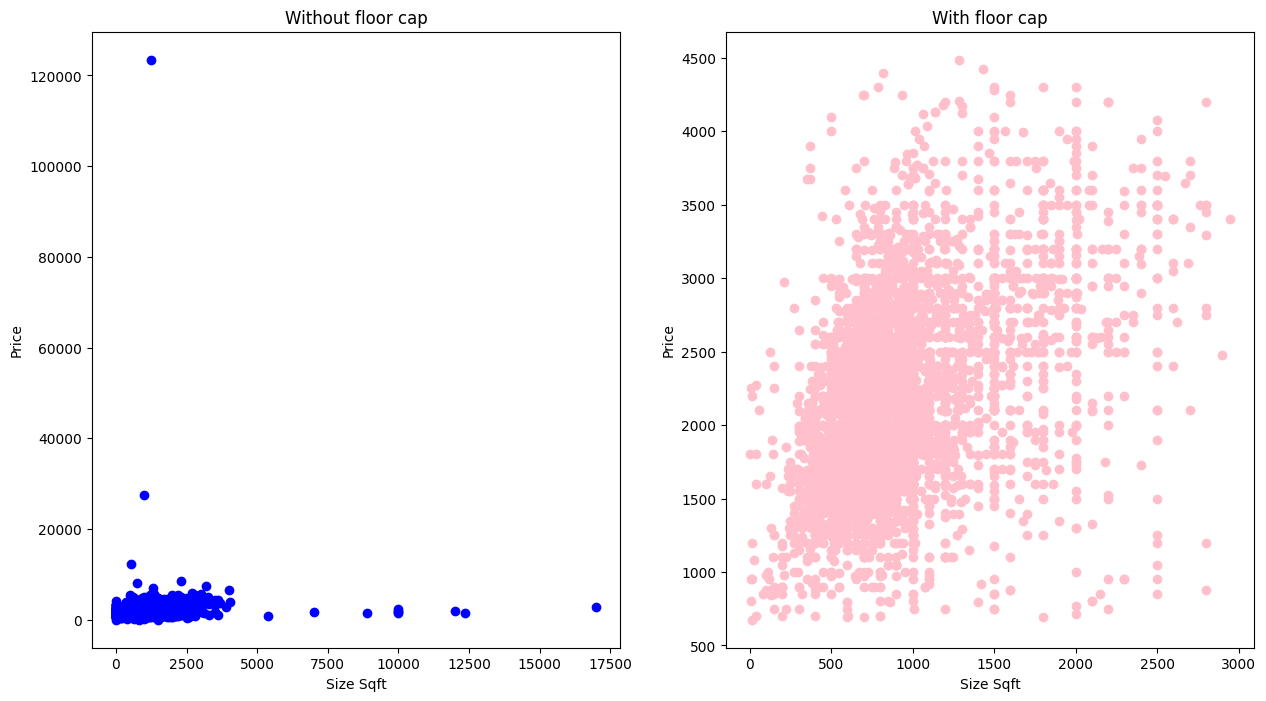

In [52]:
#scatter plot after floor cap
#using scatterplots 
fig,ax=plt.subplots(1,2, figsize=(15,8))
ax[0].scatter(df['Size_sqft'],df['Price'],c='blue', cmap='rainbow')
ax[0].set_xlabel('Size Sqft')
ax[0].set_ylabel('Price')
ax[0].set_title('Without floor cap')


ax[1].scatter(floor_cap_df['Size_sqft'],floor_cap_df['Price'],c='pink', cmap='rainbow')
ax[1].set_xlabel('Size Sqft')
ax[1].set_ylabel('Price')
ax[1].set_title('With floor cap')

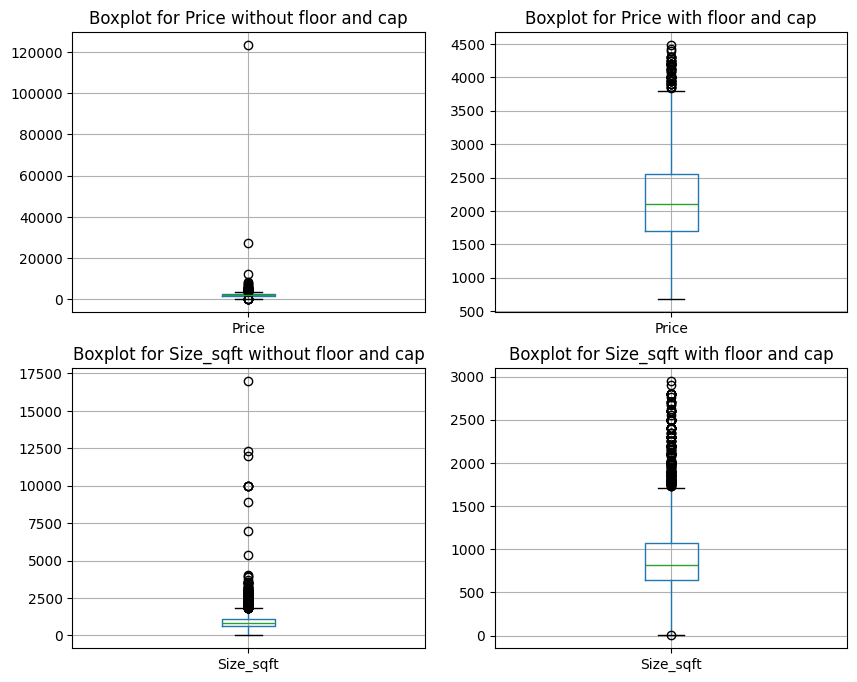

In [53]:
### Drawing BOX - PLOT for each column
use_columns = [ 'Price','Size_sqft' ]
plt.figure(figsize = (10, 8))
for i , col in enumerate( use_columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 2 , 2 , 2*i + 1 )
    df.boxplot(column=col)
    plt.title("Boxplot for %s without floor and cap"%col)
    #plt.xlabel(col)
    # Plotting various columns to demonstrate distributions
    plt.subplot( 2 , 2 , 2*i + 2 )
    floor_cap_df.boxplot(column=col)
    plt.title("Boxplot for %s with floor and cap"%col)
    #plt.xlabel(col)
plt.show()

### 7.2 Trimming

In [54]:
use_columns = [ 'Price','Size_sqft' ]
df2 = df.copy()
idx_trimmed = ( (df2[use_columns] >=Lower_Whisker) & (df2[use_columns] <=Upper_Whisker) ).all(axis=1)
trimmed_df = df2[idx_trimmed]
print('df2: ',df2.shape)
print('Trimmed df2: ',trimmed_df.shape)


df2:  (5096, 20)
Trimmed df2:  (4671, 20)


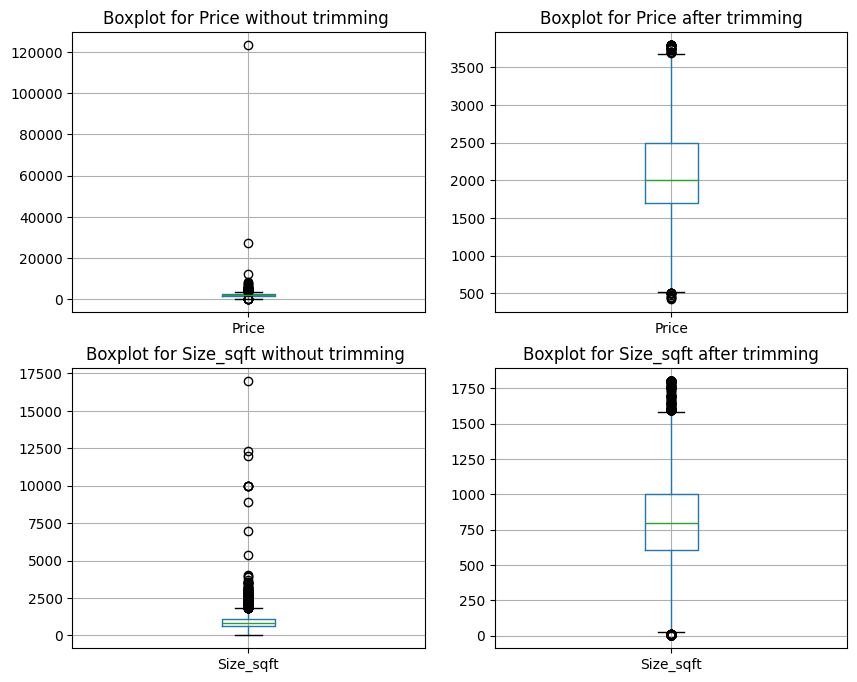

In [55]:
### Drawing BOX - PLOT for each column
use_columns = [ 'Price','Size_sqft' ]
plt.figure(figsize = (10, 8))
for i , col in enumerate( use_columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 2 , 2 , 2*i + 1 )
    df.boxplot(column=col)
    plt.title("Boxplot for %s without trimming "%col)
    #plt.xlabel(col)
    # Plotting various columns to demonstrate distributions
    plt.subplot( 2 , 2 , 2*i + 2 )
    trimmed_df.boxplot(column=col)
    plt.title("Boxplot for %s after trimming"%col)
    #plt.xlabel(col)
plt.show()

Text(0.5, 1.0, 'After Trimming')

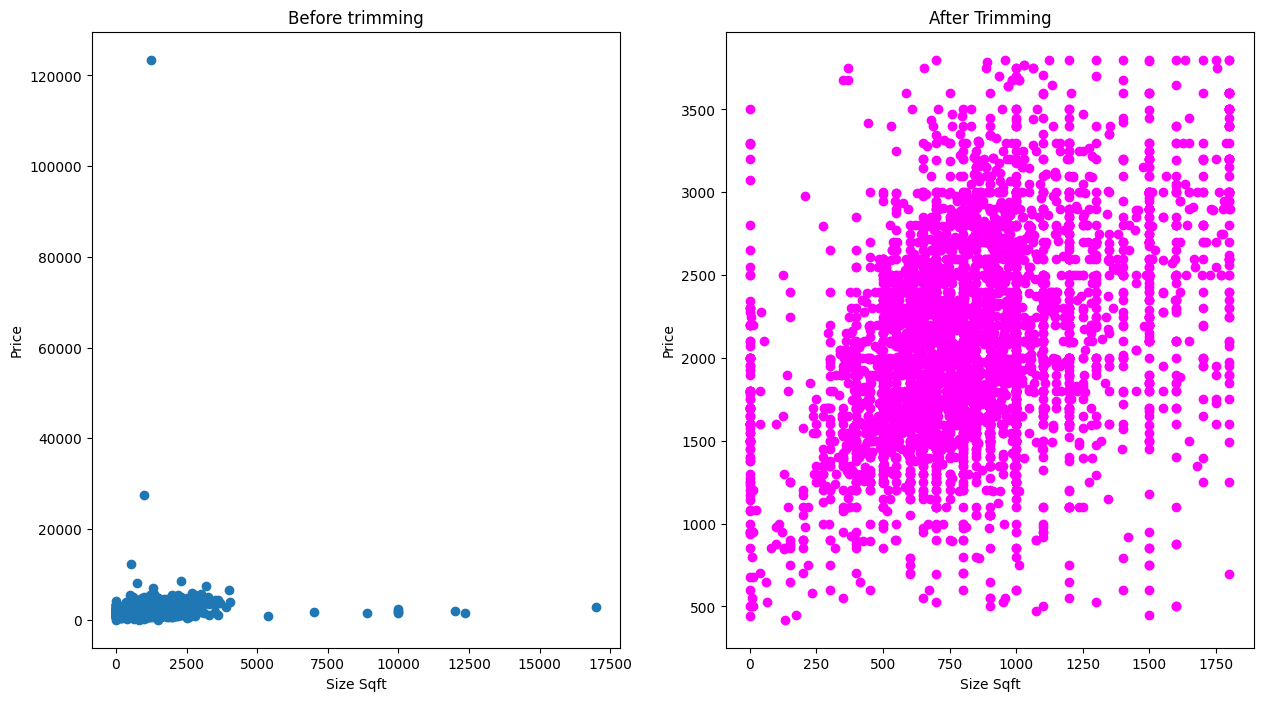

In [56]:
#scatter plot before and after trimming
#using scatterplots 

fig,ax=plt.subplots(1,2, figsize=(15,8))
ax[0].scatter(df['Size_sqft'],df['Price'])
ax[0].set_xlabel('Size Sqft')
ax[0].set_ylabel('Price')
ax[0].set_title('Before trimming')


ax[1].scatter(trimmed_df['Size_sqft'],trimmed_df['Price'],c='magenta')
ax[1].set_xlabel('Size Sqft')
ax[1].set_ylabel('Price')
ax[1].set_title('After Trimming')

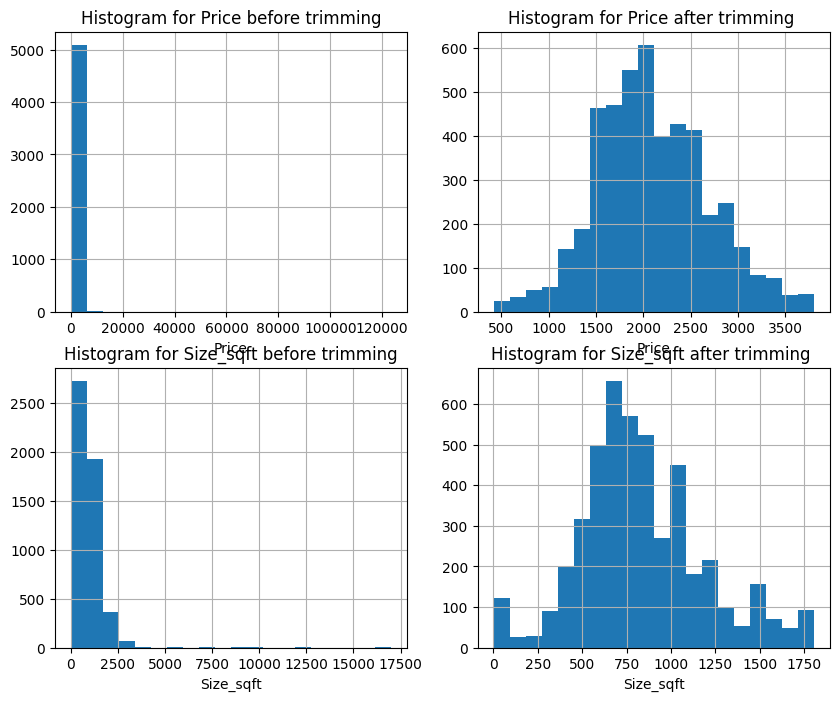

In [57]:
### Drawing histogram for price and size_sqft
use_columns = [ 'Price','Size_sqft' ]
plt.figure(figsize = (10, 8))
for i , col in enumerate(use_columns):
    
    # Plotting histogram to  demonstrate distributions before trimming
    plt.subplot( 2 , 2 , 2*i + 1 )
    df[col].hist(bins = 20)
    plt.title("Histogram for %s before trimming"%col)
    plt.xlabel(col)
    
    # Plotting histogram  to demonstrate distributions after trimming
    plt.subplot( 2 , 2 , 2*i + 2 )
    trimmed_df[col].hist(bins = 20)
    plt.title("Histogram for %s after trimming "%col)
    plt.xlabel(col)
plt.show()

### 7.3 Log Transformation

In [58]:
log_df=df.copy()

In [59]:
# For Price
print( " Price Skew : " , log_df["Price"].skew().round(2) )

# For Size Sqft
print( "Size Sqft Skew  : " , log_df["Size_sqft"].skew().round(2) )


 Price Skew :  52.81
Size Sqft Skew  :  7.5


In [60]:
### For Price
log_df["log_price"] = log_df["Price"].map( lambda i : np.log(i) if i > 0 else 0 )
print( "Log Price Skew : " , log_df["log_price"].skew().round(2) )

### For Size_sqft
log_df["log_size_sqft"] = log_df["Size_sqft"].map( lambda i : np.log(i) if i > 0 else 0 )
print( "Log Size Sqft Skew : " , log_df["log_size_sqft"].skew().round(2) )
###

Log Price Skew :  -4.41
Log Size Sqft Skew :  -4.54


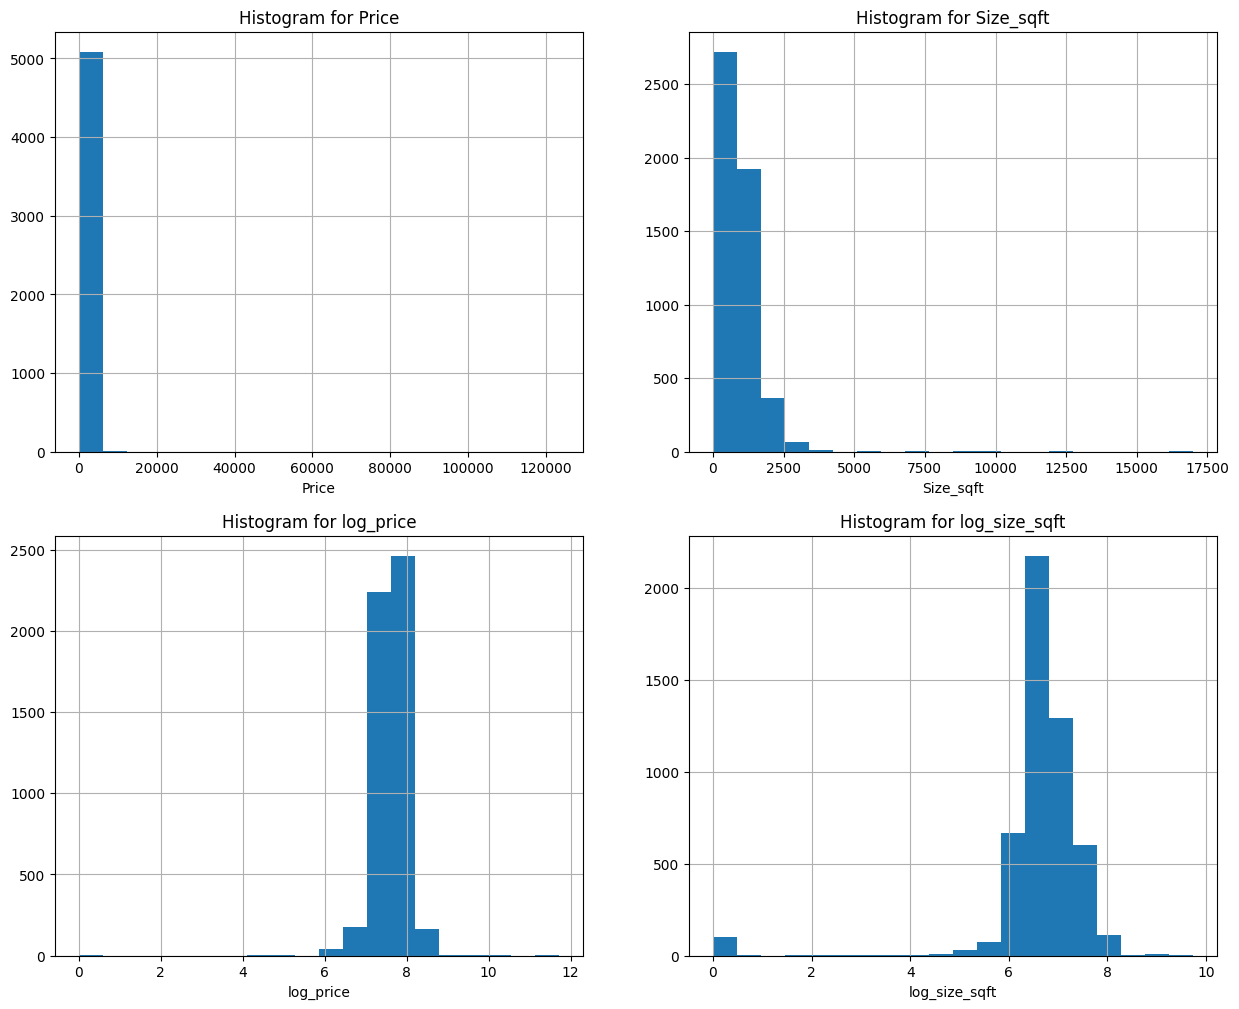

In [61]:
### Drawing histogram for price and size_sqft
use_columns = ['Price','Size_sqft','log_price','log_size_sqft']
plt.figure(figsize = (15, 12))
for i , col in enumerate( use_columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 2 , 2 , i + 1 )
    log_df[col].hist(bins = 20)
    plt.title("Histogram for %s"%col)
    plt.xlabel(col)
plt.show()

## 8. Clustering Techniques

### 8.1 KMEANS

In [62]:
kmeans_df = trimmed_df.drop(columns=['Title','Price_condition','Unit_type','Pet_friendly','Furnished_info','Description'])
selected_columns =['Unit_type_Apartment','Unit_type_Basement','Unit_type_Condo','Unit_type_Duplex/Triplex','Unit_type_House','Unit_type_Townhouse']
kmeans_df[selected_columns] = kmeans_df[selected_columns].apply(lambda x: x.astype(int))
kmeans_df.head()

Bedrooms  Bathrooms Parking  Size_sqft   Price  Encoded_Furnished_info  \
1       0.5        1.0       0      425.0  2099.0                       0   
2       2.0        1.0       0      831.0  2275.0                       0   
3       2.0        1.0       1      950.0  2125.0                       0   
4       1.0        1.0       0      834.0  1895.0                       0   
5       3.0        2.0       1     1180.0  2770.0                       0   

   encoded_price_condition  encoded_pet_friendly  Unit_type_Apartment  \
1                        1                     3                    1   
2                        2                     3                    1   
3                        3                     1                    1   
4                        2                     3                    1   
5                        1                     1                    0   

   Unit_type_Basement  Unit_type_Condo  Unit_type_Duplex/Triplex  \
1                   0                0                         0   
2                   0                0                         0   
3                   0                0                         0   
4                   0                0                         0   
5                   0                0                         0   

   Unit_type_House  Unit_type_Townhouse  
1                0                    0  
2                0                    0  
3                0                    0  
4                0                    0  
5                1                    0

In [63]:
kmeans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4671 entries, 1 to 11075
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Bedrooms                  4671 non-null   float64 
 1   Bathrooms                 4671 non-null   float64 
 2   Parking                   4671 non-null   category
 3   Size_sqft                 4671 non-null   float64 
 4   Price                     4671 non-null   float64 
 5   Encoded_Furnished_info    4671 non-null   int64   
 6   encoded_price_condition   4671 non-null   int64   
 7   encoded_pet_friendly      4671 non-null   int64   
 8   Unit_type_Apartment       4671 non-null   int32   
 9   Unit_type_Basement        4671 non-null   int32   
 10  Unit_type_Condo           4671 non-null   int32   
 11  Unit_type_Duplex/Triplex  4671 non-null   int32   
 12  Unit_type_House           4671 non-null   int32   
 13  Unit_type_Townhouse       4671 non-null   int32   
d

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans_df['Size_sqft']=scaler.fit_transform(kmeans_df[['Size_sqft']])
kmeans_df['Price']=scaler.fit_transform(kmeans_df[['Price']])
kmeans_df.head()
dbscan_df=kmeans_df.copy()

In [65]:
from sklearn.cluster import KMeans

inertias=[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_df[['Size_sqft','Price','Bedrooms','Bathrooms']])
    inertias.append(kmeans.inertia_)

inertias

[13744.635624063369,
 8178.35058964334,
 6620.184064335197,
 5502.4867095729605,
 4820.113896045531,
 4414.299239258821,
 4123.519306109575,
 3771.7279143414294,
 3529.238872999801,
 3250.5160163186188,
 3117.272225269795,
 2919.860358226692,
 2773.8064582890383,
 2712.7726701581337]

In [66]:
import plotly.express as px
fig = px.line(x=range(1, 15), y=inertias)

# Adding axis labels and title
fig.update_layout(
    xaxis_title="Centroids",
    yaxis_title="Error",
    title="No. of Centroids vs Error",
)

# Adding markers
fig.update_traces(mode='markers+lines')

# Display the plot
fig.show()

In [67]:
kmeans = KMeans(n_clusters=6, random_state=17, n_init="auto")
kmeans.fit_transform(kmeans_df)
kmeans.labels_

array([0, 0, 5, ..., 4, 5, 4])

In [68]:
kmeans_df['Cluster']=kmeans.predict(kmeans_df)
kmeans_df.head()

Bedrooms  Bathrooms Parking  Size_sqft     Price  Encoded_Furnished_info  \
1       0.5        1.0       0  -1.160420  0.008573                       0   
2       2.0        1.0       0  -0.008317  0.307138                       0   
3       2.0        1.0       1   0.329368  0.052679                       0   
4       1.0        1.0       0   0.000196 -0.337491                       0   
5       3.0        2.0       1   0.982037  1.146852                       0   

   encoded_price_condition  encoded_pet_friendly  Unit_type_Apartment  \
1                        1                     3                    1   
2                        2                     3                    1   
3                        3                     1                    1   
4                        2                     3                    1   
5                        1                     1                    0   

   Unit_type_Basement  Unit_type_Condo  Unit_type_Duplex/Triplex  \
1                   0                0                         0   
2                   0                0                         0   
3                   0                0                         0   
4                   0                0                         0   
5                   0                0                         0   

   Unit_type_House  Unit_type_Townhouse  Cluster  
1                0                    0        0  
2                0                    0        0  
3                0                    0        5  
4                0                    0        0  
5                1                    0        1

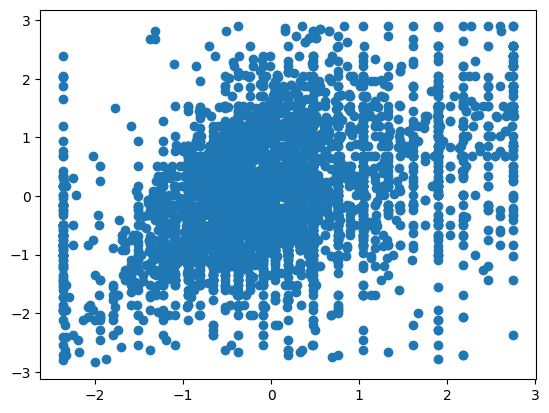

In [69]:
plt.scatter(kmeans_df['Size_sqft'],kmeans_df['Price'])

In [70]:
fig = px.scatter(kmeans_df, x='Size_sqft', y='Price', color='Cluster')
fig.show()

In [71]:
fig = px.scatter_3d(kmeans_df, x='Size_sqft', y='Price', z='Bedrooms', color='Cluster',
                    title="3D Scatter Plot - Price vs Size_Sqft vs Bedroom",
                    )


fig.show()

In [72]:
from sklearn.cluster import DBSCAN
dbscan_df['Cluster'] = DBSCAN(eps=0.08, min_samples=5).fit_predict(dbscan_df[['Size_sqft','Price']])


In [73]:
fig = px.scatter(dbscan_df, x='Size_sqft', y='Price', color='Cluster')
fig.show()

In [74]:
fig = px.scatter_3d(dbscan_df, x='Size_sqft', y='Price', z='Bedrooms', color='Cluster',
                    title="3D Scatter Plot - Price vs Size_Sqft vs Bedroom",
                    )


fig.show()

Text(0.5, 1.0, 'Cluster Dendrogram')

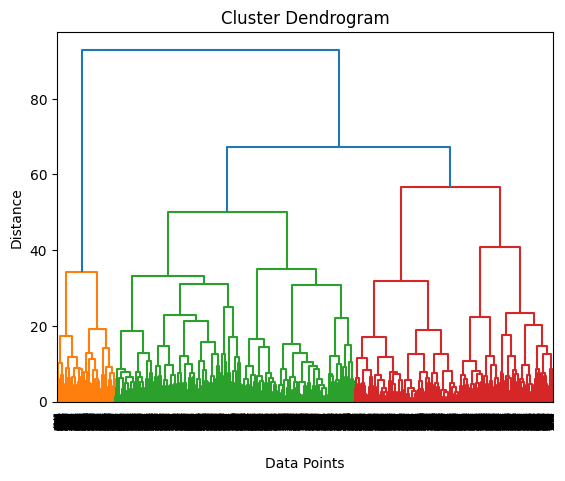

In [75]:
#Importing libs for clustering and plotting
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


agglomerative_df = kmeans_df.drop(columns=['Cluster']).copy()

points=agglomerative_df.values.tolist()
# Plotting dendrogram
dendrogram =sch.dendrogram(sch.linkage(points,method='ward'))
plt.ylabel('Distance')
plt.xlabel('Data Points',labelpad=20)
plt.title('Cluster Dendrogram')




In [76]:
agg= AgglomerativeClustering(n_clusters=5,linkage='ward')
agglomerative_df['Cluster'] =agg.fit_predict(points)

In [77]:
fig = px.scatter(agglomerative_df, x='Size_sqft', y='Price', color='Cluster')
fig.show()

In [78]:
fig = px.scatter_3d(agglomerative_df, x='Size_sqft', y='Price', z='Bedrooms', color='Cluster',
                    title="3D Scatter Plot - Price vs Size_Sqft vs Bedroom",
                    )


fig.show()

## 9. NLP Techniques

### 9.1 Cleaning text

In [130]:
## Load df into new dataframe nlp_df
nlp_df=trimmed_df[['Description']][:300].copy()
nlp_df.head()

Description
1  Description\nBroadview Mansions at 569 Broadvi...
2  Description\nRealstar's 5062-5078 Dundas Stree...
3  Description\nAre you looking for a modern, cle...
4  Description\n1 Bed, 1 Bath, Spacious, Newly Re...
5  Description\nIn high demand, this suite offers...

In [131]:
    
nlp_df['Description'] = nlp_df['Description'].apply(lambda x: x.replace('\n'," "))
nlp_df['raw_Description'] =nlp_df['Description']
nlp_df

Description  \
1    Description Broadview Mansions at 569 Broadvie...   
2    Description Realstar's 5062-5078 Dundas Street...   
3    Description Are you looking for a modern, clea...   
4    Description 1 Bed, 1 Bath, Spacious, Newly Ren...   
5    Description In high demand, this suite offers ...   
..                                                 ...   
674  Description Bright and Clean Spacious 1 Bedroo...   
675  Description *Super Bright, Spacious 3+1 Bedroo...   
676  Description Amazing location! Steps from the C...   
677  Description Brand new 2 bedroom basement for r...   
678  Description 5 bedroom full house for rent with...   

                                       raw_Description  
1    Description Broadview Mansions at 569 Broadvie...  
2    Description Realstar's 5062-5078 Dundas Street...  
3    Description Are you looking for a modern, clea...  
4    Description 1 Bed, 1 Bath, Spacious, Newly Ren...  
5    Description In high demand, this suite offers ...  
..                                                 ...  
674  Description Bright and Clean Spacious 1 Bedroo...  
675  Description *Super Bright, Spacious 3+1 Bedroo...  
676  Description Amazing location! Steps from the C...  
677  Description Brand new 2 bedroom basement for r...  
678  Description 5 bedroom full house for rent with...  

[300 rows x 2 columns]

In [132]:
## Stop word removal
from nltk.corpus import stopwords
import string
stopwords=list(stopwords.words('english'))
custom_stopwords=['description','parking','room','suite','apartment','bedroom','living','building','Available','unit','laundry',
                  'available','rent','park','located','suite','included','one','many','lt','apartment'
                  ]

stopwords=stopwords+custom_stopwords
def stopword_removal(text):
    ## punctuation removal
    pun_removed_text=text.translate(str.maketrans('','',string.punctuation))
    
    word_token=[word.lower() for word in word_tokenize(pun_removed_text) if ((word.lower() not in stopwords)and len(word)>2)]
    
    return word_token
    

nlp_df['cleaned_description'] = nlp_df['Description'].apply(lambda x:' '.join(stopword_removal(x)))

In [133]:
nlp_df['cleaned_description'][:5]

1    broadview mansions 569 broadview tennis broadv...
2    realstars 50625078 dundas street west apartmen...
3    looking modern clean secure place call home le...
4    bed bath spacious newly renovated kitchen stai...
5    high demand offers luxury private home atmosph...
Name: cleaned_description, dtype: object

In [134]:
import demoji #For emoji to word conversion
from spellchecker import SpellChecker #For checking spelling and apply fixes


#Downloading emoji dataset along with emojies denifition/name
demoji.download_codes()

# Initialize SpellChecker for correcting word spellings
spellChecker = SpellChecker()


nlp_df['cleaned_description'] = nlp_df['cleaned_description'].apply(lambda description: demoji.replace_with_desc(description))


C:\Users\sudhy\AppData\Local\Temp\ipykernel_26704\3412877557.py:6: FutureWarning:

The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.



In [135]:
def digitRemover(text):
    words = word_tokenize(text)
    temp=[]
    for word in words:
        new_word = re.sub(r'\d', '', word)
        temp.append(new_word)

    return temp

nlp_df['cleaned_description'] = nlp_df['cleaned_description'].apply(lambda description: digitRemover(description))
nlp_df['cleaned_description']

1      [broadview, mansions, , broadview, tennis, bro...
2      [realstars, , dundas, street, west, apartments...
3      [looking, modern, clean, secure, place, call, ...
4      [bed, bath, spacious, newly, renovated, kitche...
5      [high, demand, offers, luxury, private, home, ...
                             ...                        
674    [bright, clean, spacious, basement, rentfully,...
675    [super, bright, spacious, baths, sunny, southf...
676    [amazing, location, steps, canal, elgin, stree...
677    [brand, new, basement, stainless, steel, appli...
678    [full, house, car, close, school, hwy, nice, b...
Name: cleaned_description, Length: 300, dtype: object

In [160]:
def lemm(values):
    val = spacy_nlp(" ".join(values))
    temp=[]
    for token in val:
        lemma = token.lemma_
        temp.append(lemma)
    return temp


nlp_df['cleaned_description'] = nlp_df['cleaned_description'].apply(lambda description: lemm(description) )

In [164]:
all_words = nlp_df['cleaned_description'].apply(lambda x: ' '.join(x)).tolist()
all_words=" ".join(all_words)

In [166]:
all_words=pd.DataFrame({'all_words':word_tokenize(all_words)}) 
all_words.value_counts()

all_words   
floor           205
new             194
view            166
feature         157
walk            155
               ... 
preservation      1
present           1
federal           1
ferry             1
⁠near             1
Name: count, Length: 3217, dtype: int64

In [174]:
value_counts_df = pd.DataFrame(all_words['all_words'].value_counts())
value_counts_df

count
all_words        
floor         205
new           194
view          166
feature       157
walk          155
...           ...
rock            1
alley           1
bowling         1
pharmasave      1
asap            1

[3217 rows x 1 columns]

In [175]:
fig = px.bar(value_counts_df.iloc[:15][::-1], x='count', title='Bar Graph')
fig.show()

In [182]:

value_counts_df = value_counts_df.reset_index()
value_counts_df

all_words  count
0          floor    205
1            new    194
2           view    166
3        feature    157
4           walk    155
...          ...    ...
3212        rock      1
3213       alley      1
3214     bowling      1
3215  pharmasave      1
3216        asap      1

[3217 rows x 2 columns]

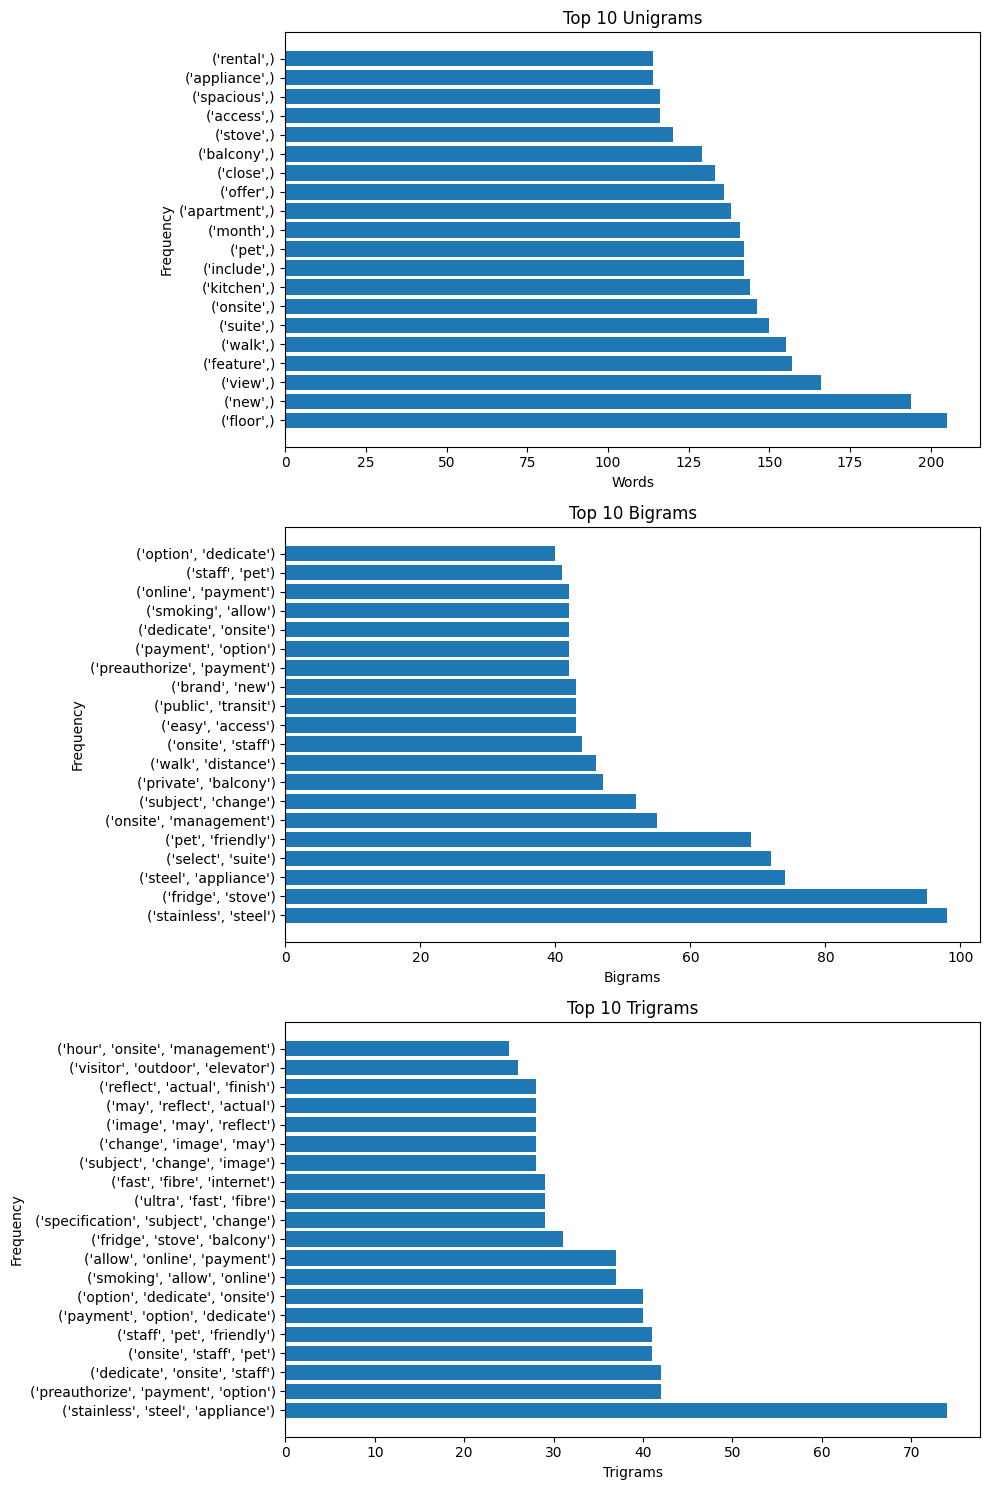

In [238]:

import collections
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams

def ngramsPlotter(corpus):
    # Tokenize it into words
    words = corpus.lower().split()

    # Create lists of unigrams, bigrams, and trigrams
    unigrams_list = list(ngrams(words, 1))
    bigrams_list = list(ngrams(words, 2))
    trigrams_list = list(ngrams(words, 3))

    # Count the frequency of each unigram, bigram, and trigram
    unigram_list_counts = collections.Counter(unigrams_list)
    bigram_list_counts = collections.Counter(bigrams_list)
    trigram_list_counts = collections.Counter(trigrams_list)

    # Plot the horizontal bar charts for top 10 ngrams
    fig, axs = plt.subplots(3, figsize=(10, 15))

    top_10_unigrams = dict(unigram_list_counts.most_common(20))
    axs[0].barh([str(k) for k in top_10_unigrams.keys()], top_10_unigrams.values())
    axs[0].set_title("Top 10 Unigrams")
    axs[0].set_xlabel("Words")
    axs[0].set_ylabel("Frequency")

    top_10_bigrams = dict(bigram_list_counts.most_common(20))
    axs[1].barh([str(k) for k in top_10_bigrams.keys()], top_10_bigrams.values())
    axs[1].set_title("Top 10 Bigrams")
    axs[1].set_xlabel("Bigrams")
    axs[1].set_ylabel("Frequency")

    top_10_trigrams = dict(trigram_list_counts.most_common(20))
    axs[2].barh([str(k) for k in top_10_trigrams.keys()], top_10_trigrams.values())
    axs[2].set_title("Top 10 Trigrams")
    axs[2].set_xlabel("Trigrams")
    axs[2].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


item = [items for subItems in nlp_df['cleaned_description'].tolist() for items in subItems]
ngramsPlotter(" ".join(item))